# BERTOPIC TRANSCRIPT

**CSV and ZIP files can be accessed here: [Link](https://drive.google.com/drive/folders/1jKjOTyyYNjnx2AffbWK5zXMhz7H8cdlz?usp=drive_link)**

#### **Step 1:** Load the csv file containing the information about the transcripts

(note: I renamed my csv file to results before running the code below)

In [ ]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
import pandas as pd

# Replace file path with file path of transcripts.csv
file_path = '/Users/janinechuaching/Desktop/THS-ST2/results.csv'
# file_path = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\cleaned_results.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df

####  **Step 2:** Download the ZIP file containing the transcript, extract the contents of the zip file and into a new folder called "transcripts".  filesarray will be used to store the file names of the transcripts.

(new folder called "transcripts", this is where the extracted transcript files will be placed) <br>
(note: I renamed the zip file to transcripts, including its inner file before running the code below)

In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = '/Users/janinechuaching/Desktop/THS-ST2/transcripts.zip'
# zip_file_path = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\cleaned_transcripts.zip'

# Specify the directory where you want to extract the files
extracted_dir = '/Users/janinechuaching/Desktop/THS-ST2/'
# extracted_dir = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs'

# Create the new directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the 'transcripts' folder from the zip file into the new folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Assuming 'transcripts' is a top-level folder in the zip file
    zip_ref.extractall(extracted_dir, members=[member for member in zip_ref.namelist() if member.startswith('cleaned_transcripts/')])

# List the extracted files
filesarray = []

for root, dirs, files in os.walk(os.path.join(extracted_dir, 'cleaned_transcripts')):
    filesarray.extend(files)
    # Uncomment this to just get n number of files
    # filesarray.extend(files[:10000]) 

print(f"Number of extracted file transcripts: {len(filesarray)}")

####  **Step 3:** Pre-process the contents of the transcripts by removing text with brackets, for example "[Music]". Place these transcripts into cleaned_contents.

In [ ]:
import os
import re
import random

# Initialize the random number generator to ensure repeatability
random.seed(42)  # You can choose any number you like

# Function to remove content within brackets and newline characters using regular expressions
def clean_text(text):
    # Lowercase to maintain consistency (optional based on your use case)
    text = text.lower()
    # Remove special characters and brackets, keeping essential punctuation
    text = re.sub(r'\[.*?\]', '', text) # Removing content within brackets
    text = re.sub(r'[^a-z0-9\s.,!?\'\']', ' ', text) # Keeping basic punctuation (edited to include apostophe)
    text = re.sub(r'\n+', ' ', text) # Replace one or more newline characters with a single space
    text = re.sub(r'\s+', ' ', text) # Replace duplicate/extra spaces
    return text

# Specify the directory containing the extracted files
extracted_dir = '/Users/janinechuaching/Desktop/THS-ST2/transcripts/'
# extracted_dir = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\cleaned_transcripts'

# List all files in the new folder
files = os.listdir(extracted_dir)

cleaned_contents = []
wahoo = []
filesarray = []
ctr = 0

# Process and collect the cleaned content of each file
for file_name in files:
    file_path = os.path.join(extracted_dir, file_name)
    try:
        with open(file_path, 'r', encoding='latin-1') as file:
            content = file.read()
            # Use the updated function to remove brackets and newlines
            if(len(content.split()) >= 50):
                wahoo.append(content)

            cleaned_content = clean_text(content)
            if(len(cleaned_content.split()) >= 50):
                cleaned_contents.append(cleaned_content)
                filesarray.append(file_name)
            ctr = ctr + 1
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        

# Sample without affecting the original lists
if len(cleaned_contents) >= len(cleaned_contents):
    sample_size = len(cleaned_contents)
    # Generate a list of indexes based on cleaned_contents length
    indexes = range(len(cleaned_contents))
    # Randomly select 5000 indexes from the list
    sampled_indexes = random.sample(indexes, sample_size)
    # Retrieve only the contents for the sampled indexes
    sampled_data = [cleaned_contents[index] for index in sampled_indexes] 
    sampled_data_name = [filesarray[index] for index in sampled_indexes]
else:
    print("Not enough contents to sample from.")
    sampled_data = []

In [ ]:
# print("DOCU 1")
# print(cleaned_contents[2])
# print("------------------------------------------------------------")
# print(wahoo[2])

In [ ]:
# `sampled_data` contains only the sampled cleaned contents.
# Note: No modification is made to `cleaned_contents` and `filesarray`

    # # Generate a list of indexes based on cleaned_contents length
    # sample_size = len(cleaned_contents)
    # sampled_indexes = range(len(cleaned_contents))
    # # Retrieve only the contents for the sampled indexes
    # sampled_data = [cleaned_contents[index] for index in sampled_indexes]
    # sampled_data_name = [filesarray[index] for index in sampled_indexes]


# print('length of sample_size: ', sample_size)

In [ ]:
print("length of cleaned contents before cleaning: ", ctr)
print("length of cleaned contents after cleaning: ", len(sampled_data))
print("Number of removed transcripts after cleaning: ", ctr - len(sampled_data))


####  **Step 4:** Import the BERTopic class to fetch the functions and algorithms available in the package.

In [ ]:
def saveDF(save_df, name):
    save_df.to_csv(name, index=False)

In [ ]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

# Fine-tune your topic representations
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN

####  **Step 5:** Create an instance of the class, "language" specifies that the language of the documents are in english, "calculate_probabilities" allows for the calculation of the probabilities of the the topics for each document, and "verbose" provides additional information during topic modelling

At times, stop words might end up in our topic representations. This is something we typically want to avoid as they contribute little to the interpretation of the topics. However, removing stop words as a preprocessing step is not advised as the transformer-based embedding models that we use need the full context to create accurate embeddings.

Instead, we can use the **CountVectorizer** to preprocess our documents after having generated embeddings and clustered our documents. I have found almost no disadvantages to using the CountVectorizer to remove stop words and it is something I would strongly advise to try out:


Representation Model: The term "representation model" suggests a model used to represent text or documents in a meaningful vector space. These representations often capture semantic information about the text, enabling downstream tasks such as clustering, classification, or summarization.

KeyBERT-Inspired: The name **KeyBERTInspired** implies that the model is inspired by KeyBERT, which is known for extracting keywords from text using BERT embeddings. KeyBERTInspired model might perform similar tasks, such as extracting key phrases or features from text using BERT-based embeddings.

Click this link to understand more about this representation model: [KeyBERT](https://maartengr.github.io/BERTopic/getting_started/representation/representation.html#keybertinspired)

a random state for **UMAP** was set prevent any stochastic behavior. This will ensure consistent results for every run.

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
# Fine-tune your topic representations
representation_model = KeyBERTInspired()

In [ ]:
# Trial 5
hdbscan_model = HDBSCAN(
    min_cluster_size = 30,
    min_samples = 15, 
    metric='euclidean',
    prediction_data=True
    )

umap_model = UMAP(n_neighbors = 10,
                  min_dist = 0.01,
                  n_components = 2, 
                  metric = 'cosine',
                  random_state=42)

topic_model = BERTopic(hdbscan_model=hdbscan_model,
                                        top_n_words = 10, 
                                        min_topic_size = 40,
                                        vectorizer_model = vectorizer_model, 
                                        representation_model = representation_model, 
                                        umap_model=umap_model, 
                                        language='english', 
                                        calculate_probabilities=True, 
                                        verbose=True)

In [ ]:
# Trial 8
hdbscan_model = HDBSCAN(
    min_cluster_size = 15,
    min_samples = 20, 
    metric='euclidean',
    prediction_data=True
    )

umap_model = UMAP(n_neighbors = 10,
                  min_dist = 0.01,
                  n_components = 2, 
                  metric = 'cosine',
                  random_state=42)

topic_model = BERTopic(hdbscan_model=hdbscan_model,
                                        top_n_words = 10, 
                                        min_topic_size = 20,
                                        vectorizer_model = vectorizer_model, 
                                        representation_model = representation_model, 
                                        umap_model=umap_model, 
                                        language='english', 
                                        calculate_probabilities=True, 
                                        verbose=True)

####  **Step 6:** This line fits the topic_model to the document data. The fit_transform method takes the docs as input and performs topic modeling. It returns two outputs: 

**topics:** A list that contains the assigned topic for each document in docs <br>
**probs:** A list that contains the corresponding probability values for each topic assignment.

In [ ]:
topics, probs = topic_model.fit_transform(sampled_data)

In [ ]:
print(type(topics))
print(type(probs))

---

#### **Step 7:** View the different clusters that have been formed and their information:

**Topic:** The identifier or label assigned to each topic (cluster) <br>
**Count:** The number of documents assigned to each topic. <br>
**Name:** A representative name or label for each topic. This label is generated based on the most frequent terms in the documents assigned to the topic. <br>
**Words:** A list of the most frequent terms in the documents assigned to each topic. <br>
**Example Documents:** A sample of documents that are representative of the topic.

In [ ]:
freq = topic_model.get_topic_info()
freq
saveDF(freq, "freq.csv")

In [ ]:
freq

In [ ]:
topic_model.get_topic(-1)

In [ ]:
topic_model.generate_topic_labels()

In [ ]:
freq['Representation'].head(10) #topics

In [ ]:
freq['Representative_Docs'].head(10)

##### **To view all the topics of each cluster**

In [ ]:
end = (len(freq))-2
start = -1

for cluster_id_to_examine in range(start, end+1):
    # Get the words for the chosen cluster
    cluster_words = topic_model.get_topic(cluster_id_to_examine)
    # Print the words
    print(f"Words in Cluster {cluster_id_to_examine}:\n{cluster_words} \n")


##### **To view the information about the clusters**

In [ ]:
# Retrieve information about the documents
document_info = topic_model.get_document_info(sampled_data)
document_info

In [ ]:
saveDF(document_info, "documentinforesults.csv")

In [ ]:
def getDocumentsInCluster(cluster_id_to_examine):
    
    # Convert document information to a DataFrame (if it's not already)
    document_info_df = pd.DataFrame(document_info, columns=["Topic"])

    # Filter rows with "Topic" value equal to -1
    outlier_rows = document_info_df[document_info_df["Topic"] == cluster_id_to_examine]

    # Extract the indexes of outlier rows in cleaned contents
    outlier_indexes = outlier_rows.index.tolist()

    # Print or process the outlier indexes as needed
    # print(outlier_indexes)
    # print(len(outlier_indexes))

    filenames = []

    for value in outlier_indexes:
        #print(value)
        new_file_name = sampled_data_name[value] 
        filenames.append(new_file_name)
        #print(new_file_name + "\n")

    print(f"\nNumber documents in cluster  {cluster_id_to_examine}: {len(filenames)} \n")
    # print(filenames)


    # Extract first 11 characters from each filename
    edited_filenames = [filename[:11] for filename in filenames]

    # Use .isin() to filter rows based on the edited values
    filtered_df = df[df['Video Id'].str[:11].isin(edited_filenames)]

    # Find edited filenames not found in the filtered DataFrame
    not_found_filenames = set(edited_filenames) - set(filtered_df['Video Id'].str[:11])

    
    name = 'cluster' + str(cluster_id_to_examine) + '.csv'
    print('Cluster information saved in: ', name)
    print(f"Number documents in cluster {cluster_id_to_examine} found in df : {filtered_df.shape[0]} \n")
    # display(filtered_df)
    
    saveDF(filtered_df, name)

In [ ]:
end = (len(freq))-2
start = -1

for cluster_id_to_examine in range(start, end+1):
    getDocumentsInCluster(cluster_id_to_examine)

In [ ]:
import pandas as pd
from datetime import datetime

def getClusterInformation(cluster_id_to_examine):
    
    name = 'cluster' + str(cluster_id_to_examine) + '.csv'
    
    # Replace file path with file path of transcripts.csv
    file_path = '/Users/janinechuaching/Desktop/THS-ST2/' + name
    # file_path = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\Trial8\\' + name

    # Read the CSV file into a DataFrame
    filtered_df = pd.read_csv(file_path)
    
    
    # Assuming df is your dataframe for one cluster
    # Calculate Total Views of the Cluster
    total_views = filtered_df['Video Views'].sum()

    # Calculate Average Views of the Cluster
    average_views = filtered_df['Video Views'].mean()

    # Calculate Total Likes of the Cluster
    total_likes = filtered_df['Video Likes'].sum()

    # Calculate Average Likes of the Cluster
    average_likes = filtered_df['Video Likes'].mean()
    
    num_documents = filtered_df.shape[0]

    # Output the results
    print("Cluster", cluster_id_to_examine)
    print(f"Number of Documents for Cluster: {num_documents}")
    print(f"Total Views for Cluster: {total_views}")
    print(f"Average Views for Cluster: {average_views}")
    print(f"Total Likes for Cluster: {total_likes}")
    print(f"Average Likes for Cluster: {average_likes}\n")

In [ ]:
end = (len(freq))-2
start = -1

for cluster_id_to_examine in range(start, end+1):
    getClusterInformation(cluster_id_to_examine)

In [ ]:
def getDocumentsInCluster(cluster_id_to_examine):
    
    # Get documents in the specified cluster based on document-topic probabilities
    documents_in_cluster = [i for i, probabilities in enumerate(probs) if probabilities.argmax() == cluster_id_to_examine]

    # Print the documents
    # print(f"Documents in Cluster {cluster_id_to_examine}:\n{documents_in_cluster}")

    filenames = []

    for value in documents_in_cluster:
        #print(value)
        new_file_name = sampled_data_name[value] 
        filenames.append(new_file_name)
        #print(new_file_name + "\n")

    # print(f"\nNumber documents in cluster  {cluster_id_to_examine} : {len(filenames)} \n")
    # print(filenames)


    # Extract first 11 characters from each filename
    edited_filenames = [filename[:11] for filename in filenames]

    # Use .isin() to filter rows based on the edited values
    filtered_df = df[df['Video Id'].str[:11].isin(edited_filenames)]

    # Find edited filenames not found in the filtered DataFrame
    not_found_filenames = set(edited_filenames) - set(filtered_df['Video Id'].str[:11])

    name = 'newcluster' + str(cluster_id_to_examine) + '.csv'
    print('Cluster information saved in: ', name)
    print(f"Number documents in cluster {cluster_id_to_examine} found in df : {filtered_df.shape[0]} \n")
    # display(filtered_df)
    
    saveDF(filtered_df, name)

In [ ]:
end = (len(freq))-2
start = 0

for cluster_id_to_examine in range(start, end+1):
    getDocumentsInCluster(cluster_id_to_examine)

##### **Further clustering the outlier cluster**

In [ ]:
# contains array of outliers to be placed as input for bertopic
extracted_outliers = [cleaned_contents[i] for i in outlier_indexes]

# print(len(extracted_outliers))

In [ ]:
topic_model_out = BERTopic(vectorizer_model=vectorizer_model, representation_model = representation_model, language='english', calculate_probabilities=True, verbose=True)
topics_out, probs_out = topic_model_out.fit_transform(extracted_outliers)

In [ ]:
freq_out = topic_model_out.get_topic_info()
freq_out

##### **We can now see the top pairs of topics by cosine similarity. There are topics with close meanings that we could merge.**

code is based on this [link](https://towardsdatascience.com/topics-per-class-using-bertopic-252314f2640)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


distance_matrix = cosine_similarity(np.array(topic_model.topic_embeddings_))
dist_df = pd.DataFrame(distance_matrix, columns=topic_model.topic_labels_.values(), 
                       index=topic_model.topic_labels_.values())

tmp = []
for rec in dist_df.reset_index().to_dict('records'):
    t1 = rec['index']
    for t2 in rec:
        if t2 == 'index': 
            continue
        tmp.append(
            {
                'topic1': t1, 
                'topic2': t2, 
                'distance': rec[t2]
            }
        )

pair_dist_df = pd.DataFrame(tmp)

pair_dist_df = pair_dist_df[(pair_dist_df.topic1.map(
      lambda x: not x.startswith('-1'))) & 
            (pair_dist_df.topic2.map(lambda x: not x.startswith('-1')))]
pair_dist_df = pair_dist_df[pair_dist_df.topic1 < pair_dist_df.topic2]
pair_dist_df.sort_values('distance', ascending = False).head(20)

In [ ]:
# topic_model.merge_topics(docs, [[26, 74], [43, 68, 62], [16, 50, 91]])
# df['merged_topic'] = topic_model.topics_

##### **Statistics**

View Total and Average Views and Likes per Cluster

In [ ]:
import pandas as pd

# Assuming 'freq' is defined, 'probs' contains the document-topic probabilities,
# 'filesarray' contains the filenames, and 'df' is the original dataframe

end = (len(freq)) - 2
start = 0
cluster_data = []  # List to hold data for all clusters

for cluster_id_to_examine in range(start, end + 1):
 # Convert document information to a DataFrame (if it's not already)
    document_info_df = pd.DataFrame(document_info, columns=["Topic"])

    # Filter rows with "Topic" value equal to -1
    outlier_rows = document_info_df[document_info_df["Topic"] == cluster_id_to_examine]

    # Extract the indexes of outlier rows in cleaned contents
    outlier_indexes = outlier_rows.index.tolist()

    # Print or process the outlier indexes as needed
    # print(outlier_indexes)
    # print(len(outlier_indexes))

    filenames = []

    for value in outlier_indexes:
        #print(value)
        new_file_name = sampled_data_name[value] 
        filenames.append(new_file_name)
        #print(new_file_name + "\n")

    # print(f"\nNumber documents in cluster  {cluster_id_to_examine}: {len(filenames)} \n")
    # # print(filenames)

    # Extract first 11 characters from each filename
    edited_filenames = [filename[:11] for filename in filenames]

    # Use .isin() to filter rows based on the edited values
    filtered_df = df[df['Video Id'].str[:11].isin(edited_filenames)]

    # Calculate Total and Average Views and Likes of the Cluster
    total_views = filtered_df['Video Views'].sum()
    average_views = filtered_df['Video Views'].mean()
    total_likes = filtered_df['Video Likes'].sum()
    average_likes = filtered_df['Video Likes'].mean()
    num_documents = filtered_df.shape[0]

    # Create a dictionary of the results
    cluster_dict = {
        'Cluster ID': cluster_id_to_examine,
        'Total Views': total_views,
        'Average Views': average_views,
        'Total Likes': total_likes,
        'Average Likes': average_likes,
        'Number of Documents': num_documents
    }
    
    # Append the cluster data to the list
    cluster_data.append(cluster_dict)

# Convert the list of dictionaries to a dataframe
cluster_summary_df = pd.DataFrame(cluster_data)

# Display the new dataframe
display(cluster_summary_df)

saveDF(cluster_summary_df, 'cluster_statistics_summary_df.csv')

In [ ]:
# Sort the cluster summary dataframe by 'Average Views' in descending order
sorted_cluster_df = cluster_summary_df.sort_values(by='Average Views', ascending=False)

# Get a list of 'Cluster ID' in descending order of 'Average Views'
sorted_clusters_by_ave_views = sorted_cluster_df['Cluster ID'].tolist()

# Display the sorted list of clusters
print(f"Clusters with the highest average views: {sorted_clusters_by_ave_views}\n")

for i in range (0, 10):
    # Get the words for the chosen cluster
    cluster_words = topic_model.get_topic(sorted_clusters_by_ave_views[i])
    # Print the words
    print(f"Words in Cluster {sorted_clusters_by_ave_views[i]}:\n{cluster_words}\n")

In [ ]:
# Sort the cluster summary dataframe by 'Average Likes' in descending order
sorted_cluster_df = cluster_summary_df.sort_values(by='Average Likes', ascending=False)

# Get a list of 'Cluster ID' in descending order of 'Average Likes'
sorted_clusters_by_ave_likes = sorted_cluster_df['Cluster ID'].tolist()

# Display the sorted list of clusters
print(f"Clusters with the highest average likes: {sorted_clusters_by_ave_likes}\n")

for i in range (0, 10):
    # Get the words for the chosen cluster
    cluster_words = topic_model.get_topic(sorted_clusters_by_ave_likes[i])
    # Print the words
    print(f"Words in Cluster {sorted_clusters_by_ave_likes[i]}:\n{cluster_words}\n")

#### **Step 8:** Visualize the results of BERTopic

the intertopic distance map uses the size of the circles to show proportionally the amount of words that belong to each topic across the dictionary, and the distance between bubbles shows the degree to which both bubbles share words.

In [ ]:
fig = topic_model.visualize_topics()
fig.write_html('intertopic_distance_map.html') 

About Topic Probability Distribution: [Topic Probability Distribution](https://maartengr.github.io/BERTopic/getting_started/distribution/distribution.html)

In [ ]:
fig = topic_model.visualize_distribution(probs[0], min_probability=0.001)
fig.write_html('distribution_of_topics.html')  # Saves the figure as a PNG file

About Hierarchical Clustering [Hierarchical Clustering](https://maartengr.github.io/BERTopic/getting_started/hierarchicaltopics/hierarchicaltopics.html)

In [ ]:
fig = topic_model.visualize_hierarchy(top_n_topics=len(freq))
fig.write_html('visualize_hierarchy.html') 

In [ ]:
fig = topic_model.visualize_barchart(top_n_topics=10,  n_words=5)
fig.write_html('visualize_barchart.html') 

In [ ]:
fig = topic_model.visualize_heatmap(n_clusters=len(freq)-2, width=1000, height=1000)
fig.write_html('visualize_heatmap.html') 

In [ ]:
fig = topic_model.visualize_documents(sampled_data)

# Show the visualization
fig.show()

In [ ]:
fig.write_html('documents_visualization.html')

In [ ]:
# # Get documents in the specified cluster based on document-topic probabilities
# documents_in_cluster = [i for i, probabilities in enumerate(probs) if probabilities.argmax() > -1]

# filenames = []
# new_cleaned_contents = []

# for value in documents_in_cluster:
#     #print(value)
#     new_file_name = filesarray[value] 
#     filenames.append(new_file_name)
#     #print(new_file_name + "\n")
#     new_content = cleaned_contents[value] 
#     new_cleaned_contents.append(new_content)

# print(f"\nNumber documents in clusters : {len(filenames)} \n")

In [ ]:
# # Extract first 11 characters from each filename
# edited_filenames = [filename[:11] for filename in filenames]

# # Create a mask for filtering the DataFrame to maintain order
# mask = df['Video Id'].str[:11].isin(edited_filenames)
# filtered_df = df[mask]

# # Create a dictionary that maps the edited filenames to their index
# filename_to_index = {filename: index for index, filename in enumerate(edited_filenames)}

# # Add a new column to filtered_df that will contain the index of the edited filename
# filtered_df['index'] = filtered_df['Video Id'].str[:11].map(filename_to_index)

# # Now sort filtered_df by this new index column to maintain the order of edited_filenames
# filtered_df = filtered_df.sort_values('index')

# # After sorting, you can drop the 'index' column if you want
# filtered_df = filtered_df.drop('index', axis=1)

# # Assuming 'df' is your DataFrame and it has a 'date' column with your timestamps
# timestamps = pd.to_datetime(filtered_df['Publish Date']).dt.to_pydatetime().tolist()

# print(len(timestamps))

# # Create topics over time
# # The timestamps should be in the same order as the documents
# topics_over_time = topic_model.topics_over_time(new_cleaned_contents, timestamps)

# # Visualize the topics over time
# fig = topic_model.visualize_topics_over_time(topics_over_time)

# # Show the visualization
# fig.show()

# # If you want to save the visualization, you can do so depending on the object type:
# # For a Plotly figure object:
# fig.write_html('topics_over_time.html')

# BERTOPIC TESTING AND EXPLORATION

**NOTE: Use the following to run the data "sampled_indexes, sampled_data, and sampled_data_name" instead of cleaned_contents**
<br>
sampled_indexes - index of the random sample data from the original cleaned content data <br>
sampled_data - transcripts of the random sample data from the original cleaned content data (instead of cleaned_content) <br>
sampled_data_name - filename of the of the random sample data from the original cleaned content data (instead of files_array)

### **Understanding Each Cluster Statistics**

In [36]:
cluster_id_to_examine = 0

In [37]:
import pandas as pd

# Replace file path with file path of transcripts.csv
# file_path = '/Users/janinechuaching/Desktop/THS-ST2/Trial8/cluster' + str(cluster_id_to_examine) +'.csv'
file_path = '.\\Trial8\\cluster' + str(cluster_id_to_examine) +'.csv'
print(file_path)

# Read the CSV file into a DataFrame
cluster_df = pd.read_csv(file_path)

# Display the DataFrame
print('Cluster ', cluster_id_to_examine, ' Statistics: ')
display(cluster_df)

.\Trial8\cluster0.csv
Cluster  0  Statistics: 


Video Id          Publish Date                Channel Id  \
0    M0lKXfyJh-I  2019-05-31T03:40:39Z  UCZ7Cxp6r5JMhpSrIETCXzdQ   
1    LB20skQI1_k  2021-10-21T09:30:48Z  UCZ7Cxp6r5JMhpSrIETCXzdQ   
2    mTCgnJCyz2Q  2017-04-13T14:00:03Z  UCRzPUBhXUZHclB7B5bURFXw   
3    yOw0sYXvbIc  2018-05-09T14:26:28Z  UCRzPUBhXUZHclB7B5bURFXw   
4    _xuMLlPPhtc  2018-08-29T15:00:05Z  UCRzPUBhXUZHclB7B5bURFXw   
..           ...                   ...                       ...   
602  B7SbnMo9r5Q  2022-12-31T01:00:10Z  UCiMUkmmff55gHoVRpM2Vhaw   
603  SOAIc9ONdb4  2019-03-24T05:05:39Z  UCNMCLJlFSqiUb1EnXII3zhQ   
604  42t6Jk4JXrA  2019-03-26T13:30:00Z  UCNMCLJlFSqiUb1EnXII3zhQ   
605  VW1fCBRUBYk  2019-03-29T15:00:04Z  UCNMCLJlFSqiUb1EnXII3zhQ   
606  i73vBiLo2PA  2018-02-20T03:12:00Z  UCqtKusmK7Z9ea5CkqznGr9g   

                                           Video Title  \
0      If FREDDIE MERCURY Were FILIPINO (QUEEN Parody)   
1       If BRITNEY SPEARS Was FILIPINO (PARODY MEDLEY)   
2    Why Jollibee's Fast Food has Americans Waiting...   
3    The Amazing Filipino Restaurant Right Near The...   
4    Bad Saint Is the Most Popular Filipino Restaur...   
..                                                 ...   
602   My first try of Jollibee food in the Philippines   
603  ഫിലിപ്പൈൻസ്കാരുടെ  പോത്തിൻ കാൽ സൂപ്പ്  കുടിച്ച...   
604  Philipines Fish Market  കാഴ്ചകൾ | Harees Ameer...   
605  നമ്മളെ ജീവനോടെ കുഴിച്ചിടും പിന്നെ ചവിട്ടിമെതിക...   
606                          Filipino Food Culture Yum   

                                     Video Description  \
0    ▶Click here to SUBSCRIBE to my channel: https:...   
1    If Britney Spears was Filipino, her songs woul...   
2    In our premiere episode of Eater's new series,...   
3    On today’s episode of Dining on a Dime: Rome, ...   
4    Welcome back to Halo Halo! In this episode, Fr...   
..                                                 ...   
602  #jollibee #foodvlog #ivanileang #foodtravel #f...   
603  Tour Destinations: Thailand, Malaysia, Singapo...   
604  Tour Destinations: Thailand, Malaysia, Singapo...   
605  Tour Destinations: Thailand, Malaysia, Singapo...   
606  Mario shares on Filipino fusion food culture a...   

                            Channel Title  \
0                            Mikey Bustos   
1                            Mikey Bustos   
2                                   Eater   
3                                   Eater   
4                                   Eater   
..                                    ...   
602                           Ivani Leang   
603  Harees Ameerali - Royal Sky Holidays   
604  Harees Ameerali - Royal Sky Holidays   
605  Harees Ameerali - Royal Sky Holidays   
606                             TripsPlus   

                                            Video Tags Default Audio Language  \
0    ['Mikey Bustos', 'Pinoy', 'Filipino', 'Philipp...                     en   
1    ['Mikey Bustos', 'Pinoy', 'Filipino', 'Philipp...                     en   
2    ['jollibee', 'jollibees', 'dale talde', 'talde...                     en   
3    ['filipino food', 'sisig', 'filipino rome', 'f...                     en   
4    ['filipino', 'filipino food', 'filipino restau...                     en   
..                                                 ...                    ...   
602  ['Jollibee', 'Philippines', 'Ivani Leang', 'Jo...                     en   
603  ['tech travel eat', 'malayalam travel videosma...                     en   
604  ['malayalam travel videosmalayalam', 'travel v...                     en   
605  ['tech travel eat', 'malayalam travel videosma...                     en   
606           ['filipino food', 'tagalog', 'foodporn']                     en   

     Video Views  Video Likes  Favorite Count  Comment Count Channel Country  \
0        4696159       154513               0           8997              CA   
1         312769        12650               0           1032              CA   
2         818324         8769              

#### **Most Frequent Channel Title**

In [3]:
# Calculate value counts for the column of interest
channelNames = cluster_df['Channel Title'].value_counts().head(10)
print(channelNames)

Channel Title
Pinoy Planet          79
Nic & Rei             26
KIM n LEE             21
Beryl Shereshewsky    14
Eater                 13
Jeanelleats           12
FoodieMommaPH         12
BuzzFeedVideo         10
People Vs Food         9
한인타운 호텔&풀빌라 리조트        8
Name: count, dtype: int64


D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53588 (\N{HAN

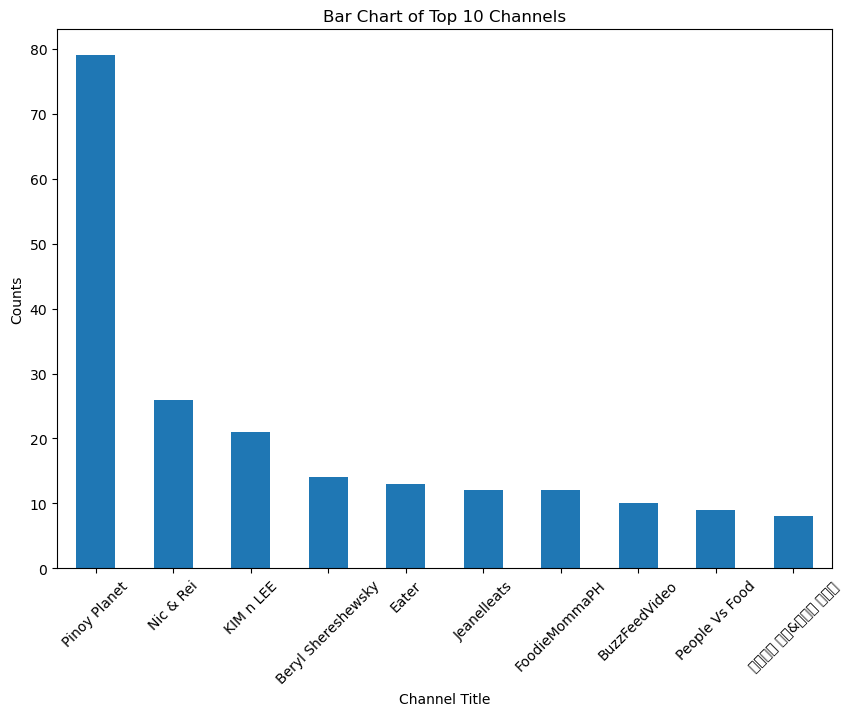

In [4]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 7))
channelNames.plot.bar()
plt.title('Bar Chart of Top 10 Channels')
plt.xlabel('Channel Title')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.show()

In [5]:
# import matplotlib.pyplot as plt

# # Create the pie chart
# plt.figure(figsize=(10, 7))
# channelNames.plot.pie(autopct='%1.1f%%', startangle=90)
# plt.title('Pie Chart of Top 10 Channels')
# plt.ylabel('')  # Hide the y-label as it's unnecessary here
# plt.show()

#### **Most Frequent Channel Country**

In [6]:
channelCountries = cluster_df['Channel Country'].value_counts().head(10)
# print(channelCountries)

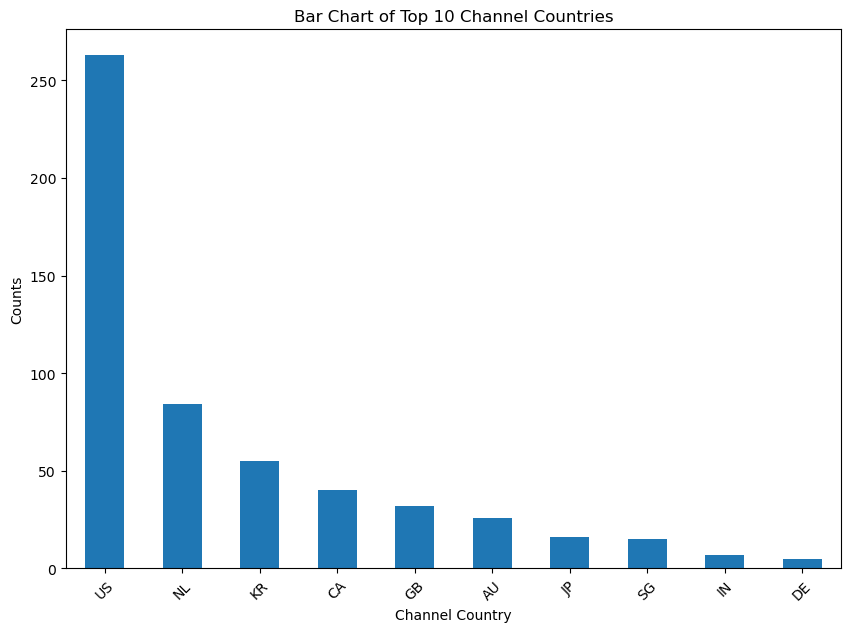

In [7]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 7))
channelCountries.plot.bar()
plt.title('Bar Chart of Top 10 Channel Countries')
plt.xlabel('Channel Country')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.show()

In [8]:
# import matplotlib.pyplot as plt

# # Create the pie chart
# plt.figure(figsize=(10, 7))
# channelCountries.plot.pie(autopct='%1.1f%%', startangle=90)
# plt.title('Pie Chart of Top 10 Channel Countries')
# plt.ylabel('')  # Hide the y-label as it's unnecessary here
# plt.show()

#### **Most Frequent Channel Publish Date** (arrange bar chart by year)

In [9]:
cluster_df['Publish Date'] = pd.to_datetime(cluster_df['Publish Date'])
year_counts = cluster_df['Publish Date'].dt.year.value_counts()
# print(year_counts)

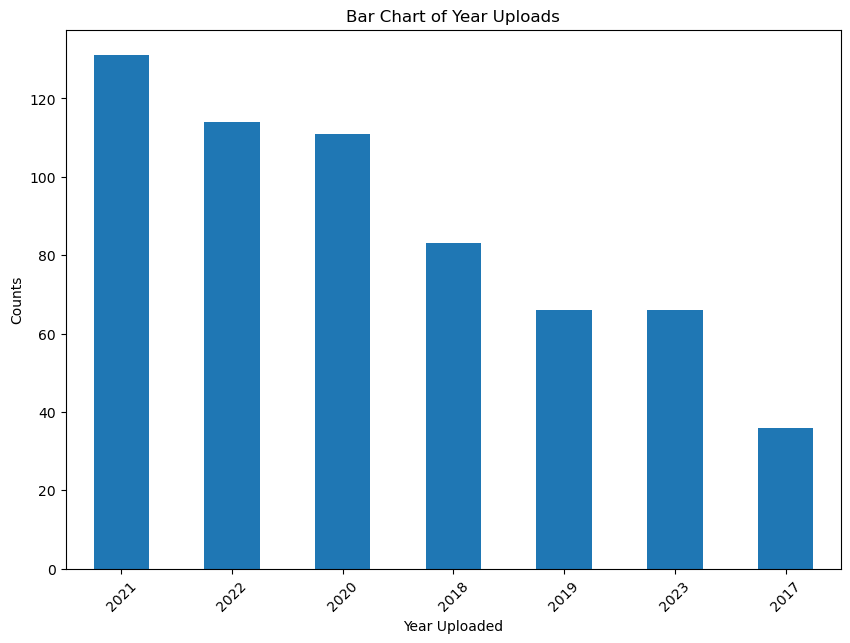

In [10]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 7))
year_counts.plot.bar()
plt.title('Bar Chart of Year Uploads')
plt.xlabel('Year Uploaded')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Rotate category names for better readability
plt.show()

In [11]:
# import matplotlib.pyplot as plt

# # Create the pie chart
# plt.figure(figsize=(10, 7))
# year_counts.plot.pie(autopct='%1.1f%%', startangle=90)
# plt.title('Pie Chart of Year Uploads')
# plt.ylabel('')  # Hide the y-label as it's unnecessary here
# plt.show()

#### **Top Channel Uploader Per Year**

In [12]:
import pandas as pd

# Convert 'Publish Date' column to datetime format
cluster_df['Publish Date'] = pd.to_datetime(cluster_df['Publish Date'])

# Extract year and channel information
df_year_channel = cluster_df.assign(year=cluster_df['Publish Date'].dt.year, channel=cluster_df['Channel Title']).drop_duplicates()

# Count the number of occurrences of each channel in each year
channel_year_counts = df_year_channel.groupby(['year', 'channel']).size().reset_index(name='count')

# Pivot the table to create separate columns for each channel
channel_year_counts_pivot = channel_year_counts.pivot(index='year', columns='channel', values='count')

channel_year_counts_pivot.fillna(0)

# Rename the index column
channel_year_counts_pivot.index.name = 'Year'

# Select top channel by count for each year
top_channel_titles = channel_year_counts_pivot.idxmax(axis=1)

# Select top channel counts for each year
top_channel_counts = channel_year_counts_pivot.max(axis=1)

# Convert count column to integer
top_channel_counts = top_channel_counts.astype(int)

# Combine top channel titles and counts into a single table
top_channel_table = top_channel_titles.to_frame('Channel Title').join(top_channel_counts.to_frame('Count'))

# Display the top channel table
print(top_channel_table)

           Channel Title  Count
Year                           
2017          Mark Wiens      7
2018           Nic & Rei     19
2019     Xiaomanyc 小马在纽约      8
2020        Pinoy Planet     29
2021        Pinoy Planet     28
2022        Pinoy Planet     20
2023  Bags Packed Family      5


#### **Distribution of Video Views Over Time**    

The values on the y-axis represent the sum of video views for each year. The y-axis represents the cumulative sum of video views for each year. The values increase as you move up the y-axis, indicating the increasing number of video views over time. 

NameError: name 'ticker' is not defined

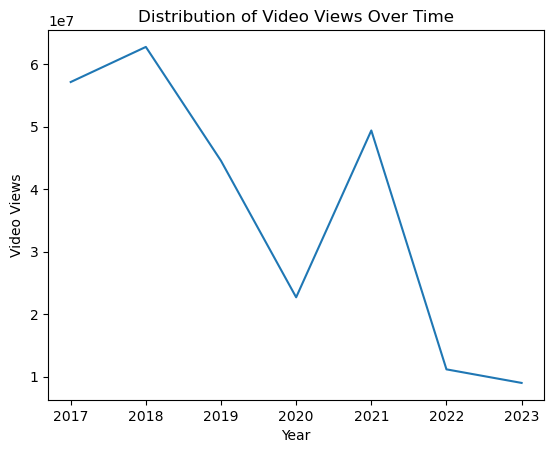

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Publish Date' column to datetime format
cluster_df['Publish Date'] = pd.to_datetime(cluster_df['Publish Date'])

# Extract year and video views information
views_by_year = cluster_df.groupby(cluster_df['Publish Date'].dt.year)['Video Views'].sum().reset_index()

# Create a line plot of the distribution of video views over time
plt.plot(views_by_year['Publish Date'], views_by_year['Video Views'])
plt.xlabel('Year')
plt.ylabel('Video Views')
plt.title('Distribution of Video Views Over Time')


# Format the y-axis labels as whole numbers
formatter = ticker.FormatStrFormatter('%d')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

#### **Distribution of Video Likes Over Time**    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert 'Publish Date' column to datetime format
cluster_df['Publish Date'] = pd.to_datetime(cluster_df['Publish Date'])

# Extract year and video likes information
likes_by_year = cluster_df.groupby(cluster_df['Publish Date'].dt.year)['Video Likes'].sum().reset_index()

# Create a line plot of the distribution of video likes over time
plt.plot(likes_by_year['Publish Date'], likes_by_year['Video Likes'])
plt.xlabel('Year')
plt.ylabel('Video Likes')
plt.title('Distribution of Video Likes Over Time')

# Format the y-axis labels as whole numbers
formatter = ticker.FormatStrFormatter('%d')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

#### **Most Popular Channels with the Most Video Views and Video Likes**    

In [2]:
import pandas as pd
import glob

# Specify the directory containing the CSV files
directory_path = 'Trial8'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(f'{directory_path}/*.csv')

# Check if any CSV files were found
if not csv_files:
    raise ValueError(f"No CSV files found in directory: {directory_path}")

# Initialize a list to hold the DataFrames
dataframes = []

# Iterate over the list of CSV files
for file_path in csv_files:
    # Extract the cluster ID from the file name
    # Assuming the file name format is 'clusterX.csv' where X is the cluster ID
    cluster_id = file_path.split('cluster')[-1].split('.')[0]
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Add a new column to the DataFrame for the cluster ID
    if cluster_id == "0":
        df['ClusterID'] = cluster_id + " - Food"
    if cluster_id == "1":
        df['ClusterID'] = cluster_id + " - Media"
    if cluster_id == "2":
        df['ClusterID'] = cluster_id + " - Travel"
    if cluster_id == "3":
        df['ClusterID'] = cluster_id + " - Culture"
    if cluster_id == "4":
        df['ClusterID'] = cluster_id + " - Beach"
    if cluster_id == "5":
        df['ClusterID'] = cluster_id + " - Politics"
    if cluster_id == "6":
        df['ClusterID'] = cluster_id + " - Foreign Travel"
    if cluster_id == "7":
        df['ClusterID'] = cluster_id + " - Engagement"
    if cluster_id == "8":
        df['ClusterID'] = cluster_id + " - Tour"
    if cluster_id == "9":
        df['ClusterID'] = cluster_id + " - Entertainment"

    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
# This will make it easier to manipulate and visualize the data
    

all_clusters_df = pd.concat(dataframes, ignore_index=True)
display(all_clusters_df)

Video Id          Publish Date                Channel Id  \
0     M0lKXfyJh-I  2019-05-31T03:40:39Z  UCZ7Cxp6r5JMhpSrIETCXzdQ   
1     LB20skQI1_k  2021-10-21T09:30:48Z  UCZ7Cxp6r5JMhpSrIETCXzdQ   
2     mTCgnJCyz2Q  2017-04-13T14:00:03Z  UCRzPUBhXUZHclB7B5bURFXw   
3     yOw0sYXvbIc  2018-05-09T14:26:28Z  UCRzPUBhXUZHclB7B5bURFXw   
4     _xuMLlPPhtc  2018-08-29T15:00:05Z  UCRzPUBhXUZHclB7B5bURFXw   
...           ...                   ...                       ...   
1462  YFOx5_ozQH8  2021-07-15T20:57:38Z  UCSKyr0rInDNW2jAWKVy4OcA   
1463  vyezxhPOZsg  2020-08-12T10:15:01Z  UChoyPLPxhJ3SgSbdRQ0m4RQ   
1464  f0rq_-Wupeg  2022-06-13T08:16:05Z  UCAtoU5rzWIGE9WMj7aVdUrg   
1465  sXsHYugynnI  2023-08-11T10:36:39Z  UCfXT2sohC0RuRDBo49ARTuQ   
1466  DFX3IvmoO18  2023-08-17T00:33:18Z  UCfXT2sohC0RuRDBo49ARTuQ   

                                            Video Title  \
0       If FREDDIE MERCURY Were FILIPINO (QUEEN Parody)   
1        If BRITNEY SPEARS Was FILIPINO (PARODY MEDLEY)   
2     Why Jollibee's Fast Food has Americans Waiting...   
3     The Amazing Filipino Restaurant Right Near The...   
4     Bad Saint Is the Most Popular Filipino Restaur...   
...                                                 ...   
1462          Celebrities You Didn't Know Were Filipino   
1463  Top 10 Most Expensive Gifts Of Filipino Celebr...   
1464       Top 10 Most Beautiful Filipino Women in 2022   
1465  Top 12 Most Followed Filipino Celebrities on S...   
1466  Top 12 Most Awarded Filipino Celebrities of Al...   

                                      Video Description    Channel Title  \
0     ▶Click here to SUBSCRIBE to my channel: https:...     Mikey Bustos   
1     If Britney Spears was Filipino, her songs woul...     Mikey Bustos   
2     In our premiere episode of Eater's new series,...            Eater   
3     On today’s episode of Dining on a Dime: Rome, ...            Eater   
4     Welcome back to Halo Halo! In this episode, Fr...            Eater   
...                                                 ...              ...   
1462  We ranked the Celebrities You Didn't Know Were...  Discovery Amuse   
1463  Top 10 Most Expensive Gifts Of Filipino Celebr...     Top 10 World   
1464  About Top 10s\n\nTop 10 Most Beautiful Filipin...     Top 10 Today   
1465  Top 12 Most Followed Filipino Celebrities\n\nH...       Ay Kaptyur   
1466  Discover the most awarded Filipino celebrities...       Ay Kaptyur   

                                             Video Tags  \
0     ['Mikey Bustos', 'Pinoy', 'Filipino', 'Philipp...   
1     ['Mikey Bustos', 'Pinoy', 'Filipino', 'Philipp...   
2     ['jollibee', 'jollibees', 'dale talde', 'talde...   
3     ['filipino food', 'sisig', 'filipino rome', 'f...   
4     ['filipino', 'filipino food', 'filipino restau...   
...                                                 ...   
1462  ['tonight show', 'jimmy fallon', 'olivia rodri...   
1463  ['Top 10', 'Top 10 World', 'top10world', 'Fili...   
1464                                                 []   
1465  ['Ivana Alawi', 'Vice Ganda', 'Anne Curtis', '...   
1466  ['Filipino celebrities', 'awards', 'acting', '...   

     Default Audio Language  Video Views  Video Likes  Favorite Count  \
0                        en      4696159       154513               0   
1                        en       312769        12650               0   
2                        en       818324         8769               0   
3                        en       533833         9254               0   
4                        en       602649        10519               0   
...                     ...          ...          ...             ...   
1462                     en      1315124        20339               0   
1463                     en         5907           55               0   
1464                     en          756           10               0   
1465                     en         2570           37               0   
1466                     en        11278      

In [ ]:
from ipywidgets import Dropdown, interact_manual
from IPython.display import display, clear_output
import plotly.graph_objects as go
import pandas as pd

# Define a function to get the top 10 channels by views and likes
def get_top_10_channels(group):
    top_views = group.sort_values(by='Video Views', ascending=False).head(10)
    top_likes = group.sort_values(by='Video Likes', ascending=False).head(10)
    return top_views, top_likes

# Group the DataFrame by 'ClusterID' and 'Channel Title', then sum 'Video Views' and 'Video Likes'
grouped_channels = all_clusters_df.groupby(['ClusterID', 'Channel Title'], as_index=False).agg({
    'Video Views': 'mean',
    'Video Likes': 'mean'
})

# Function to get top N results per cluster
def get_top_n_per_cluster(df, column, n=10):
    return df.groupby('ClusterID', group_keys=False).apply(lambda x: x.nlargest(n, column)).reset_index(drop=True)
# Get top 10 channels per cluster by video views
top_10_views_per_cluster = get_top_n_per_cluster(grouped_channels, 'Video Views', n=10)

# Get top 10 channels per cluster by video likes
top_10_likes_per_cluster = get_top_n_per_cluster(grouped_channels, 'Video Likes', n=10)

cluster_ids = grouped_channels['ClusterID'].unique()

# Create the dropdown widget
cluster_dropdown = Dropdown(options=grouped_channels['ClusterID'].unique().tolist(), description='Cluster ID:', value=grouped_channels['ClusterID'].unique().tolist()[0])

def plot_cluster_table(cluster_id):
    # with output:
        # Clear previous outputs (tables)
        # output.clear_output()
        
        # Filter the DataFrame for the selected cluster
        filtered_df_views = top_10_views_per_cluster[top_10_views_per_cluster['ClusterID'] == cluster_id]
        filtered_df_likes = top_10_likes_per_cluster[top_10_likes_per_cluster['ClusterID'] == cluster_id]
        
        # Creating a table for video views
        fig_views = go.Figure(data=[go.Table(
            header=dict(values=list(filtered_df_views.columns), fill_color='paleturquoise', align='left'),
            cells=dict(values=[filtered_df_views[col] for col in filtered_df_views.columns], fill_color='lavender', align='left'))
        ])
        fig_views.update_layout(title_text=f'Top 10 Channels by Video Views in Cluster {cluster_id}')
        
        # Creating a table for video likes
        fig_likes = go.Figure(data=[go.Table(
            header=dict(values=list(filtered_df_likes.columns), fill_color='paleturquoise', align='left'),
            cells=dict(values=[filtered_df_likes[col] for col in filtered_df_likes.columns], fill_color='lavender', align='left'))
        ])
        fig_likes.update_layout(title_text=f'Top 10 Channels by Video Likes in Cluster {cluster_id}')
        
        # Displaying the tables
        fig_views.show()
        fig_likes.show()

def on_dropdown_change(change):
    clear_output(wait=True)  # Clear the cell output
    display(cluster_dropdown)  # Redisplay the dropdown
    plot_cluster_table(change.new)  # Display tables for the new cluster

# Initialize the dropdown
cluster_dropdown = Dropdown(options=grouped_channels['ClusterID'].unique().tolist(), description='Cluster ID:')
cluster_dropdown.observe(on_dropdown_change, names='value')  # Attach the observer

# Display the dropdown for the first time
display(cluster_dropdown)

# Manually trigger the display of tables for the default cluster
plot_cluster_table(cluster_dropdown.value)

Dropdown(description='Cluster ID:', index=2, options=('0 - Food', '1 - Media', '2 - Travel', '3 - Culture', '4…

In [ ]:
from ipywidgets import Dropdown, interact_manual
from IPython.display import display, clear_output
import plotly.graph_objects as go
import pandas as pd

# Define a function to get the top 10 channels by views and likes
def get_top_10_channels(group):
    top_views = group.sort_values(by='Video Views', ascending=False).head(10)
    top_likes = group.sort_values(by='Video Likes', ascending=False).head(10)
    return top_views, top_likes

# Group the DataFrame by 'ClusterID' and 'Channel Title', then sum 'Video Views' and 'Video Likes'
grouped_channels = all_clusters_df.groupby(['ClusterID', 'Channel Title'], as_index=False).agg({
    'Video Views': 'sum',
    'Video Likes': 'sum'
})

# Function to get top N results per cluster
def get_top_n_per_cluster(df, column, n=10):
    return df.groupby('ClusterID', group_keys=False).apply(lambda x: x.nlargest(n, column)).reset_index(drop=True)
# Get top 10 channels per cluster by video views
top_10_views_per_cluster = get_top_n_per_cluster(grouped_channels, 'Video Views', n=10)

# Get top 10 channels per cluster by video likes
top_10_likes_per_cluster = get_top_n_per_cluster(grouped_channels, 'Video Likes', n=10)

cluster_ids = grouped_channels['ClusterID'].unique()

# Create the dropdown widget
cluster_dropdown = Dropdown(options=grouped_channels['ClusterID'].unique().tolist(), description='Cluster ID:', value=grouped_channels['ClusterID'].unique().tolist()[0])

def plot_cluster_table(cluster_id):
    # with output:
        # Clear previous outputs (tables)
        # output.clear_output()
        
        # Filter the DataFrame for the selected cluster
        filtered_df_views = top_10_views_per_cluster[top_10_views_per_cluster['ClusterID'] == cluster_id]
        filtered_df_likes = top_10_likes_per_cluster[top_10_likes_per_cluster['ClusterID'] == cluster_id]
        
        # Creating a table for video views
        fig_views = go.Figure(data=[go.Table(
            header=dict(values=list(filtered_df_views.columns), fill_color='paleturquoise', align='left'),
            cells=dict(values=[filtered_df_views[col] for col in filtered_df_views.columns], fill_color='lavender', align='left'))
        ])
        fig_views.update_layout(title_text=f'Top 10 Channels by Video Views in Cluster {cluster_id}')
        
        # Creating a table for video likes
        fig_likes = go.Figure(data=[go.Table(
            header=dict(values=list(filtered_df_likes.columns), fill_color='paleturquoise', align='left'),
            cells=dict(values=[filtered_df_likes[col] for col in filtered_df_likes.columns], fill_color='lavender', align='left'))
        ])
        fig_likes.update_layout(title_text=f'Top 10 Channels by Video Likes in Cluster {cluster_id}')
        
        # Displaying the tables
        fig_views.show()
        fig_likes.show()

def on_dropdown_change(change):
    clear_output(wait=True)  # Clear the cell output
    display(cluster_dropdown)  # Redisplay the dropdown
    plot_cluster_table(change.new)  # Display tables for the new cluster

# Initialize the dropdown
cluster_dropdown = Dropdown(options=grouped_channels['ClusterID'].unique().tolist(), description='Cluster ID:')
cluster_dropdown.observe(on_dropdown_change, names='value')  # Attach the observer

# Display the dropdown for the first time
display(cluster_dropdown)

# Manually trigger the display of tables for the default cluster
plot_cluster_table(cluster_dropdown.value)

Dropdown(description='Cluster ID:', index=6, options=('0 - Food', '1 - Media', '2 - Travel', '3 - Culture', '4…

#### **Ranking channels by Engagement Rates (likes/views ratio)**    

In [ ]:
import pandas as pd

# Assuming 'cluster_df' is your DataFrame loaded with data

# Calculate the engagement rate for each video
cluster_df['Engagement Rate'] = cluster_df['Video Likes'] / cluster_df['Video Views']

# Group by channel and calculate the average engagement rate
average_engagement_by_channel = cluster_df.groupby('Channel Title')['Engagement Rate'].mean().reset_index()

# Sort the channels by average engagement rate in descending order
ranked_channels_by_engagement = average_engagement_by_channel.sort_values('Engagement Rate', ascending=False)

ranked_channels_by_engagement.head(10)

#### **Change in Average Video Views and Likes Over Time** 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the dataset (This is just a placeholder, replace with your actual file path)
# cluster_df = pd.read_csv('/path/to/your/csvfile.csv')

# Since I cannot load your actual data, I will assume 'cluster_df' is already loaded with your data

# Convert 'Publish Date' to datetime
cluster_df['Publish Date'] = pd.to_datetime(cluster_df['Publish Date'])

# Create a 'YearMonth' column for grouping by both year and month
cluster_df['YearMonth'] = cluster_df['Publish Date'].dt.to_period('M')

# Group by the new 'YearMonth' column and calculate mean of video views and likes
monthly_stats = cluster_df.groupby('YearMonth').agg({'Video Views':'mean', 'Video Likes':'mean'}).reset_index()

# Convert 'YearMonth' to string for plotting
monthly_stats['YearMonth'] = monthly_stats['YearMonth'].astype(str)

# Plotting the change in average video views over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_stats['YearMonth'], monthly_stats['Video Views'], marker='o', label='Average Video Views')

# Plotting the change in average video likes over time
plt.plot(monthly_stats['YearMonth'], monthly_stats['Video Likes'], marker='x', label='Average Video Likes')

# Formatting the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Year-Month')
plt.ylabel('Average')
plt.title('Change in Average Video Views and Likes Over Time')
plt.legend()
plt.tight_layout()  # Adjust layout to fit everything nicely

# Format y-axis to show whole numbers (if necessary)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Show the plot
plt.show()


#### **Seasonal Analysis of Average Video Engagement**  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming 'cluster_df' is already loaded with your data
# Convert 'Publish Date' column to datetime format (if not already done)
cluster_df['Publish Date'] = pd.to_datetime(cluster_df['Publish Date'])

# Extract month from the 'Publish Date' column (e.g., January, February, etc.)
cluster_df['Month'] = cluster_df['Publish Date'].dt.month_name()

# Group by the new 'Month' column and calculate the mean or sum of video views and likes
# You can choose to do sum() if you want total engagement or mean() for average engagement
monthly_engagement = cluster_df.groupby('Month').agg({
    'Video Views': 'mean',  # or sum
    'Video Likes': 'mean',  # or sum
}).reset_index()

# To respect the calendar order, map the months to their respective numbers
month_order = {month: index for index, month in enumerate(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                                          'August', 'September', 'October', 'November', 'December'])}

# Add a new column for the month index
monthly_engagement['Month Index'] = monthly_engagement['Month'].map(month_order)

# Sort the data by this new month index column
monthly_engagement.sort_values('Month Index', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_engagement['Month'], monthly_engagement['Video Views'], marker='o', label='Average Video Views')
plt.plot(monthly_engagement['Month'], monthly_engagement['Video Likes'], marker='x', label='Average Video Likes')

# Formatting
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Month')
plt.ylabel('Average Engagement')
plt.title('Seasonal Analysis of Average Video Engagement')
plt.legend()
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis labels

plt.show()


### **Understanding All Cluster Statistics**

#### **Top Channel Uploader Per Year**

In [9]:
import pandas as pd

# Define cluster names and file path pattern
cluster_names = {
    0: 'Food', 1: 'Media', 2: 'Travel', 3: 'Culture', 
    4: 'Beach', 5: 'Politics', 6: 'Foreign Travel', 
    7: 'Engagement', 8: 'Tour', 9: 'Entertainment'
}

file_path_pattern = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\Trial8\\cluster{}.csv'

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Year', 'Channel', 'Count', 'Cluster Number', 'Cluster Name'])

# Iterate through all clusters
for cluster_id in range(10):
    # Load the cluster data
    file_path = file_path_pattern.format(cluster_id)
    cluster_df = pd.read_csv(file_path)

    # Convert 'Publish Date' column to datetime format
    cluster_df['Publish Date'] = pd.to_datetime(cluster_df['Publish Date'])

    # Extract year and channel information
    df_year_channel = cluster_df.assign(Year=cluster_df['Publish Date'].dt.year, Channel=cluster_df['Channel Title']).drop_duplicates()

    # Count the number of occurrences of each channel in each year
    channel_year_counts = df_year_channel.groupby(['Year', 'Channel']).size().reset_index(name='Count')

    # Find the maximum count for each year
    max_counts = channel_year_counts.groupby('Year')['Count'].transform('max')

    # Filter the channels with maximum count for each year
    top_channels = channel_year_counts[channel_year_counts['Count'] == max_counts].copy()

    # Add cluster number and name to the DataFrame
    top_channels['Cluster Number'] = cluster_id
    top_channels['Cluster Name'] = cluster_names[cluster_id]

    # Append the results to the main DataFrame
    results_df = pd.concat([results_df, top_channels], ignore_index=True)

    # Display the results for the current cluster
    print(f"Cluster {cluster_id} - {cluster_names[cluster_id]}:")
    print(top_channels.set_index('Year').sort_index())
    print()

# Display the final DataFrame
print("Final DataFrame:")
print(results_df)


Cluster 0 - Food:
                 Channel  Count  Cluster Number Cluster Name
Year                                                        
2017          Mark Wiens      7               0         Food
2018           Nic & Rei     19               0         Food
2019     Xiaomanyc 小马在纽约      8               0         Food
2020        Pinoy Planet     29               0         Food
2021        Pinoy Planet     28               0         Food
2022        Pinoy Planet     20               0         Food
2023  Bags Packed Family      5               0         Food

Cluster 1 - Media:
                      Channel  Count  Cluster Number Cluster Name
Year                                                             
2017                   JREKML     33               1        Media
2018                   JREKML     11               1        Media
2019          Reação Imediata     11               1        Media
2020                Katriinka      6               1        Media
2021             

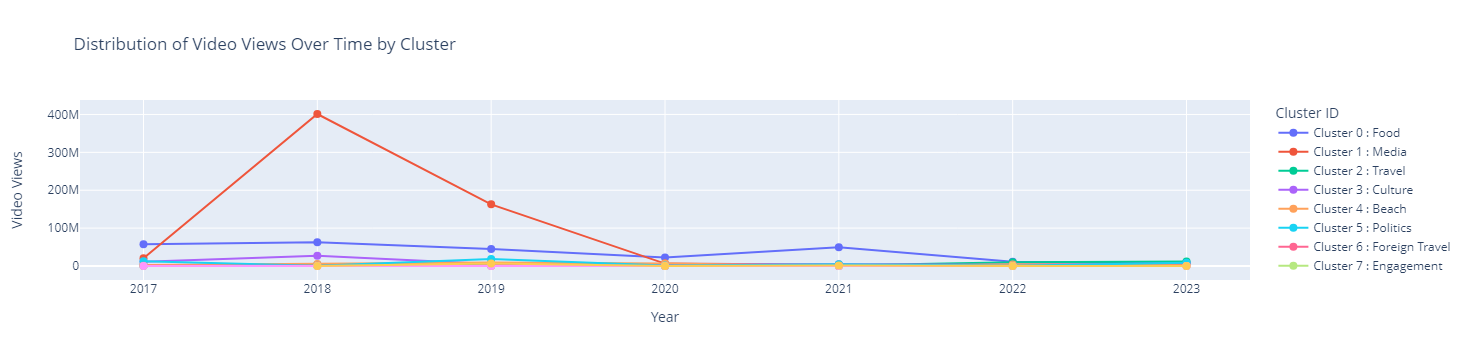

In [10]:
import pandas as pd
import plotly.graph_objects as go

# Define cluster names
cluster_names = {
    0: 'Food', 1: 'Media', 2: 'Travel', 3: 'Culture', 
    4: 'Beach', 5: 'Politics', 6: 'Foreign Travel', 
    7: 'Engagement', 8: 'Tour', 9: 'Entertainment'
}

# Function to read and process data for each cluster
def process_cluster_data(cluster_id):
    file_path = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\Trial8\\cluster' + str(cluster_id) +'.csv'
    df = pd.read_csv(file_path)
    df['Publish Date'] = pd.to_datetime(df['Publish Date'])
    views_by_year = df.groupby(df['Publish Date'].dt.year)['Video Views'].sum().reset_index()
    return views_by_year

# Initialize Plotly Figure
fig = go.Figure()

# Loop through each cluster and add to the plot
for cluster_id in range(10):
    cluster_data = process_cluster_data(cluster_id)
    fig.add_trace(go.Scatter(x=cluster_data['Publish Date'], y=cluster_data['Video Views'],
                             mode='lines+markers', name=f'Cluster {cluster_id} : {cluster_names[cluster_id]}',
                             marker=dict(size=8)))

# Update layout for a cleaner look
fig.update_layout(
    title='Distribution of Video Views Over Time by Cluster',
    xaxis_title='Year',
    yaxis_title='Video Views',
    legend_title='Cluster ID',
)

# Show the figure
fig.show()

#### **Distribution of Video Views Over Time**    

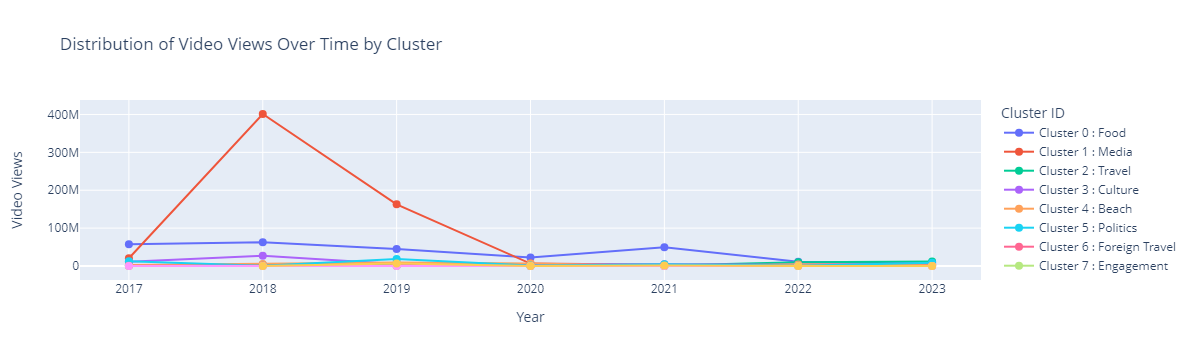

In [13]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline


cluster_names = {0:'Food', 
                 1:'Media', 
                 2:'Travel', 
                 3:'Culture', 
                 4:'Beach', 
                 5:'Politics',
                 6:'Foreign Travel', 
                 7:'Engagement', 
                 8:'Tour', 
                 9:'Entertainment'}

# Function to read and process data
def process_cluster_data(cluster_id):
    file_path = '/Users/janinechuaching/Desktop/THS-ST2/Trial8/cluster' + str(cluster_id) +'.csv'
    df = pd.read_csv(file_path)
    df['Publish Date'] = pd.to_datetime(df['Publish Date'])
    views_by_year = df.groupby(df['Publish Date'].dt.year)['Video Views'].sum().reset_index()
    return views_by_year

# Initialize Plotly Figure
fig = go.Figure()

# Loop through each cluster and add to the plot
for cluster_id in range(10):  # Assuming cluster IDs go from 0 to 9
    cluster_data = process_cluster_data(cluster_id)
    fig.add_trace(go.Scatter(x=cluster_data['Publish Date'], y=cluster_data['Video Views'],
                             mode='lines+markers', name=f'Cluster {cluster_id} : {cluster_names[cluster_id]}',
                             marker=dict(size=8)))

# Update layout for a cleaner look
fig.update_layout(
    title='Distribution of Video Views Over Time by Cluster',
    xaxis_title='Year',
    yaxis_title='Video Views',
    legend_title='Cluster ID',
)

# Show the figure
fig.show()


In [16]:
# Save the figure as an HTML file to a specified path
save_path = '/Users/janinechuaching/Desktop/distribution_of_video_views_over_time.html'  # Specify your save path here
fig.write_html(save_path)

#### **Distribution of Video Likes Over Time**    

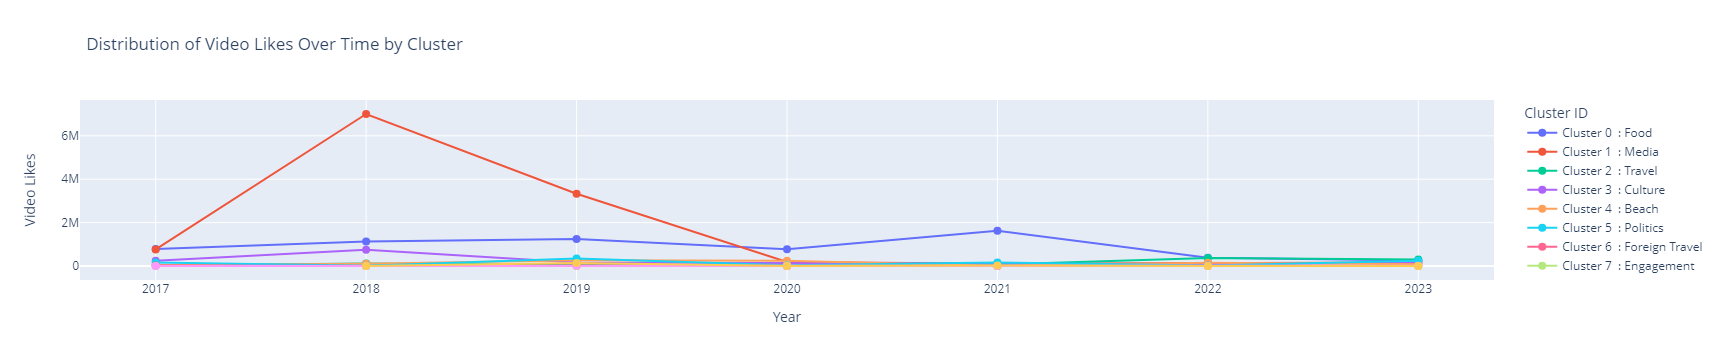

In [17]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline


cluster_names = {0:'Food', 
                 1:'Media', 
                 2:'Travel', 
                 3:'Culture', 
                 4:'Beach', 
                 5:'Politics',
                 6:'Foreign Travel', 
                 7:'Engagement', 
                 8:'Tour', 
                 9:'Entertainment'}

# Function to read and process data
def process_cluster_data(cluster_id):
    file_path = '/Users/janinechuaching/Desktop/THS-ST2/Trial8/cluster' + str(cluster_id) +'.csv'
    df = pd.read_csv(file_path)
    df['Publish Date'] = pd.to_datetime(df['Publish Date'])
    views_by_year = df.groupby(df['Publish Date'].dt.year)['Video Likes'].sum().reset_index()
    return views_by_year

# Initialize Plotly Figure
fig = go.Figure()

# Loop through each cluster and add to the plot
for cluster_id in range(10):  # Assuming cluster IDs go from 0 to 9
    cluster_data = process_cluster_data(cluster_id)
    fig.add_trace(go.Scatter(x=cluster_data['Publish Date'], y=cluster_data['Video Likes'],
                             mode='lines+markers', name=f'Cluster {cluster_id}  : {cluster_names[cluster_id]}',
                             marker=dict(size=8)))

# Update layout for a cleaner look
fig.update_layout(
    title='Distribution of Video Likes Over Time by Cluster',
    xaxis_title='Year',
    yaxis_title='Video Likes',
    legend_title='Cluster ID',
)

# Show the figure
fig.show()


In [18]:
# Save the figure as an HTML file to a specified path
save_path = '/Users/janinechuaching/Desktop/distribution_of_video_likes_over_time.html'  # Specify your save path here
fig.write_html(save_path)

#### **Change in Average Video Views and Likes Over Time**

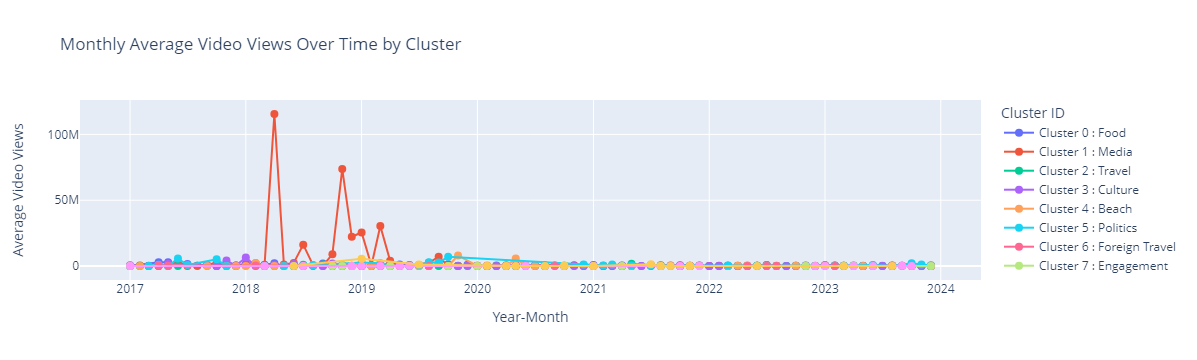

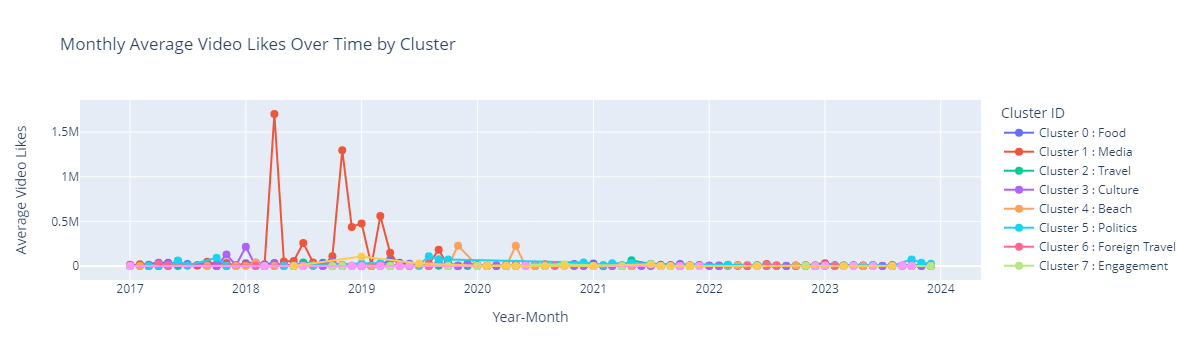

In [30]:
import pandas as pd
import plotly.graph_objects as go

# Define cluster names
cluster_names = {
    0: 'Food', 1: 'Media', 2: 'Travel', 3: 'Culture', 
    4: 'Beach', 5: 'Politics', 6: 'Foreign Travel', 
    7: 'Engagement', 8: 'Tour', 9: 'Entertainment'
}

# Function to read and process data for each cluster
def process_cluster_data(cluster_id, column_name):
    file_path = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\Trial8\\cluster' + str(cluster_id) +'.csv'
    df = pd.read_csv(file_path)
    df['Publish Date'] = pd.to_datetime(df['Publish Date'])
    # Remove timezone information
    df['Publish Date'] = df['Publish Date'].dt.tz_localize(None)
    # Group by year-month and calculate mean values
    values_by_month = df.groupby(df['Publish Date'].dt.to_period('M'))[column_name].mean().reset_index()
    # Convert period to string representing year-month
    values_by_month['Publish Date'] = values_by_month['Publish Date'].dt.to_timestamp().dt.strftime('%Y-%m')
    return values_by_month

# Initialize Plotly Figure for views
fig_views = go.Figure()

# Loop through each cluster and add to the views plot
for cluster_id in range(10):
    cluster_data = process_cluster_data(cluster_id, 'Video Views')
    fig_views.add_trace(go.Scatter(x=cluster_data['Publish Date'], y=cluster_data['Video Views'],
                             mode='lines+markers', name=f'Cluster {cluster_id} : {cluster_names[cluster_id]}',
                             marker=dict(size=8)))

# Update layout for views plot
fig_views.update_layout(
    title='Monthly Average Video Views Over Time by Cluster',
    xaxis_title='Year-Month',
    yaxis_title='Average Video Views',
    legend_title='Cluster ID',
)

# Show the views plot
fig_views.show()

# Initialize Plotly Figure for likes
fig_likes = go.Figure()

# Loop through each cluster and add to the likes plot
for cluster_id in range(10):
    cluster_data = process_cluster_data(cluster_id, 'Video Likes')
    fig_likes.add_trace(go.Scatter(x=cluster_data['Publish Date'], y=cluster_data['Video Likes'],
                             mode='lines+markers', name=f'Cluster {cluster_id} : {cluster_names[cluster_id]}',
                             marker=dict(size=8)))

# Update layout for likes plot
fig_likes.update_layout(
    title='Monthly Average Video Likes Over Time by Cluster',
    xaxis_title='Year-Month',
    yaxis_title='Average Video Likes',
    legend_title='Cluster ID',
)

# Show the likes plot
fig_likes.show()


#### **Seasonal Analysis of Average Video Engagement**  

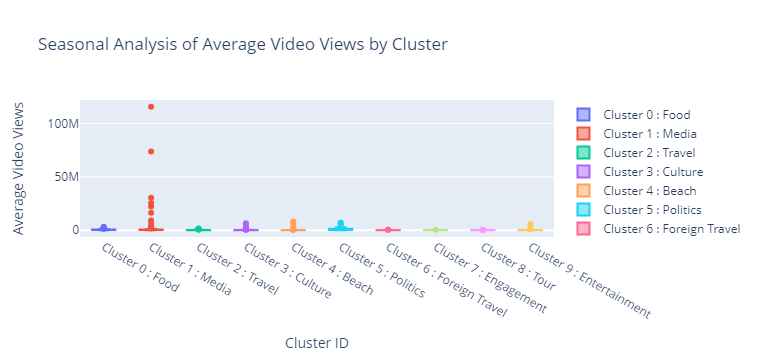

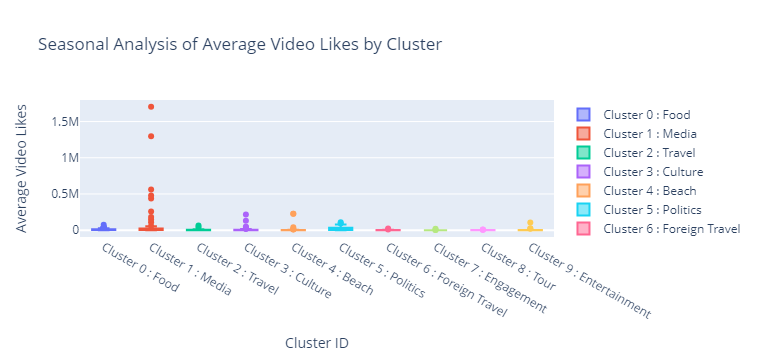

In [21]:
import pandas as pd
import plotly.graph_objects as go

# Define cluster names
cluster_names = {
    0: 'Food', 1: 'Media', 2: 'Travel', 3: 'Culture', 4: 'Beach',
    5: 'Politics', 6: 'Foreign Travel', 7: 'Engagement', 8: 'Tour', 9: 'Entertainment'
}

# Function to read and process data for each cluster
def process_cluster_data(cluster_id, column_name):
    file_path = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\Trial8\\cluster' + str(cluster_id) +'.csv'
    df = pd.read_csv(file_path)
    df['Publish Date'] = pd.to_datetime(df['Publish Date'])
    # Remove timezone information
    df['Publish Date'] = df['Publish Date'].dt.tz_localize(None)
    # Group by year-month and calculate mean values
    values_by_month = df.groupby(df['Publish Date'].dt.to_period('M'))[column_name].mean().reset_index()
    # Convert period to string representing year-month
    values_by_month['Publish Date'] = values_by_month['Publish Date'].dt.to_timestamp().dt.strftime('%Y-%m')
    return values_by_month

# Initialize Plotly Figure for views box plot
fig_views_box = go.Figure()

# Loop through each cluster and add to the views box plot
for cluster_id in range(10):
    cluster_data = process_cluster_data(cluster_id, 'Video Views')
    fig_views_box.add_trace(go.Box(y=cluster_data['Video Views'], name=f'Cluster {cluster_id} : {cluster_names[cluster_id]}'))

# Update layout for views box plot
fig_views_box.update_layout(
    title='Seasonal Analysis of Average Video Views by Cluster',
    xaxis_title='Cluster ID',
    yaxis_title='Average Video Views',
)

# Show the views box plot
fig_views_box.show()

# Initialize Plotly Figure for likes box plot
fig_likes_box = go.Figure()

# Loop through each cluster and add to the likes box plot
for cluster_id in range(10):
    cluster_data = process_cluster_data(cluster_id, 'Video Likes')
    fig_likes_box.add_trace(go.Box(y=cluster_data['Video Likes'], name=f'Cluster {cluster_id} : {cluster_names[cluster_id]}'))

# Update layout for likes box plot
fig_likes_box.update_layout(
    title='Seasonal Analysis of Average Video Likes by Cluster',
    xaxis_title='Cluster ID',
    yaxis_title='Average Video Likes',
)

# Show the likes box plot
fig_likes_box.show()


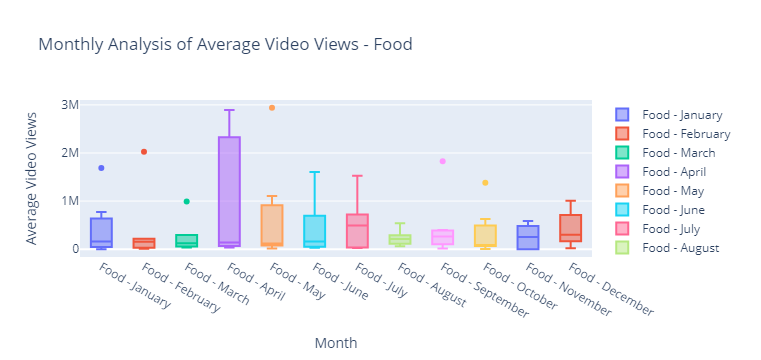

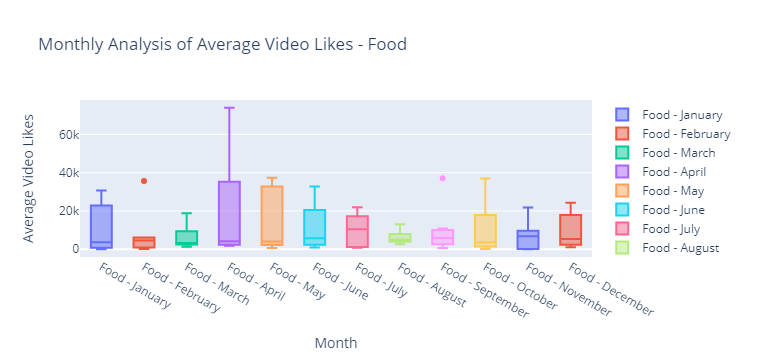

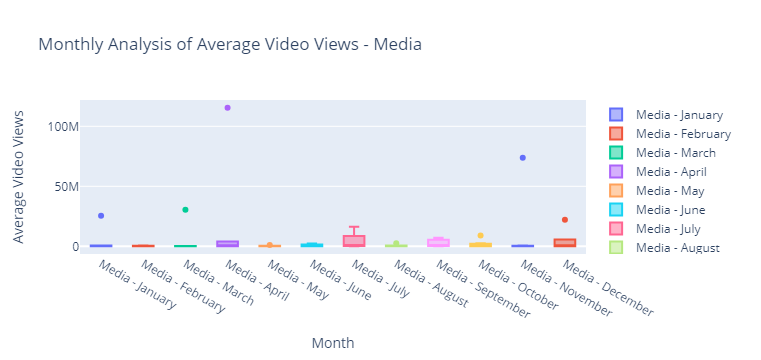

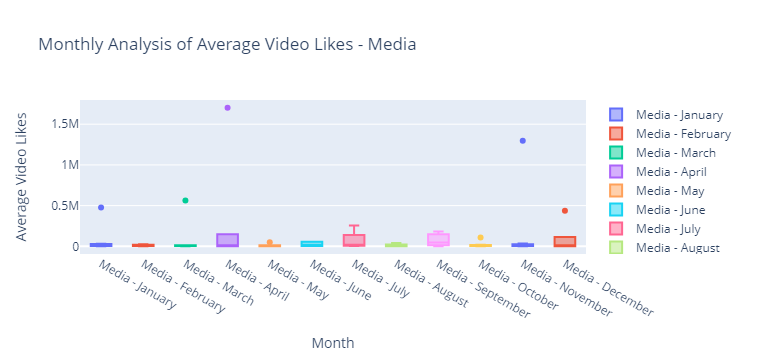

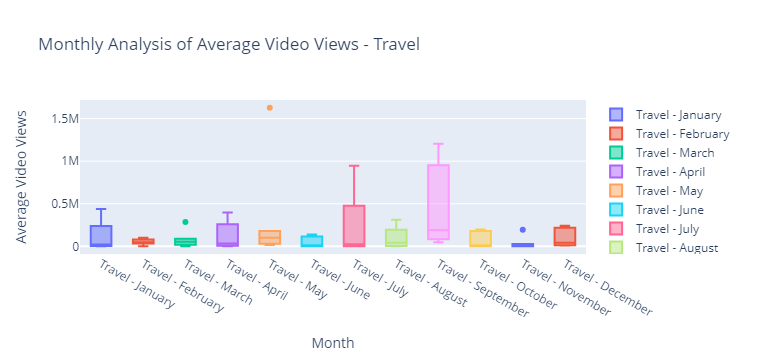

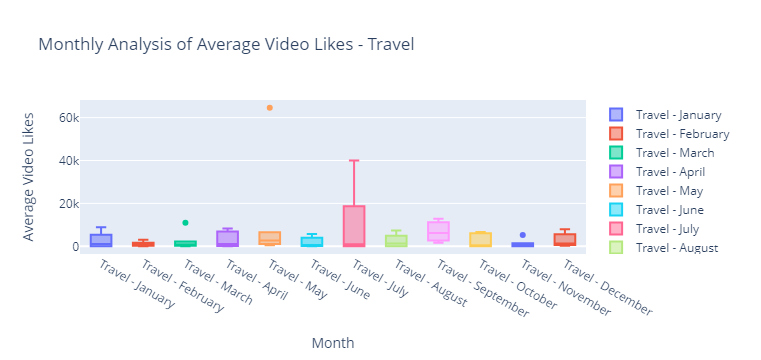

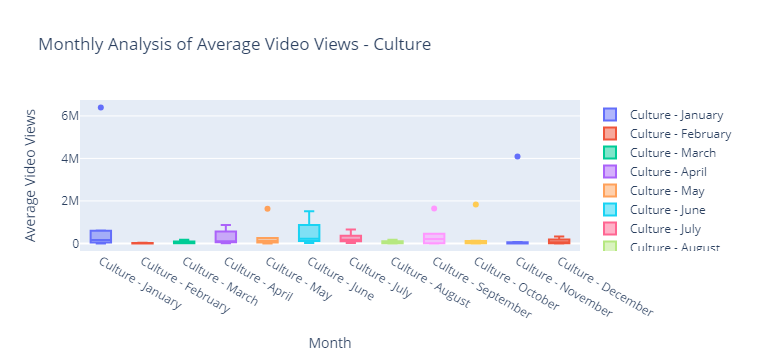

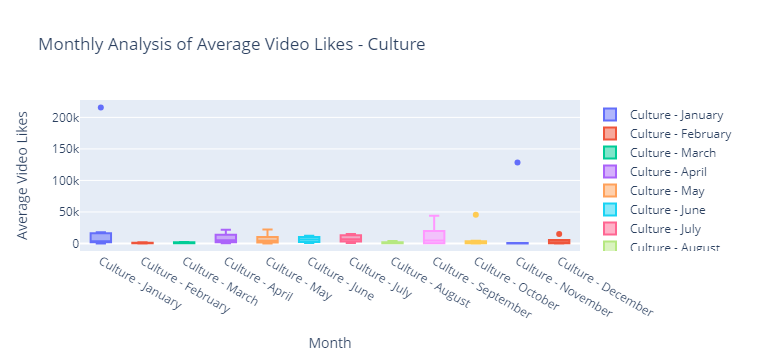

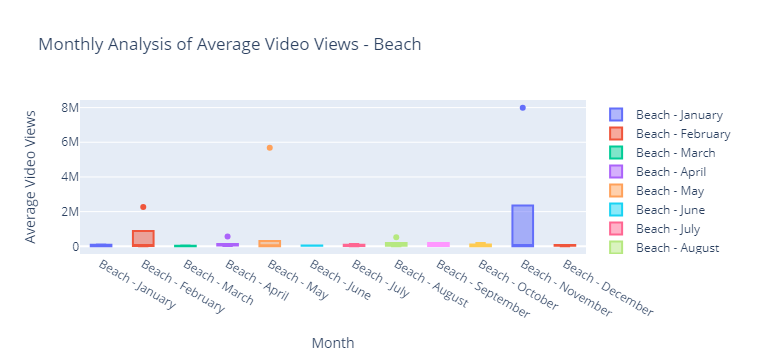

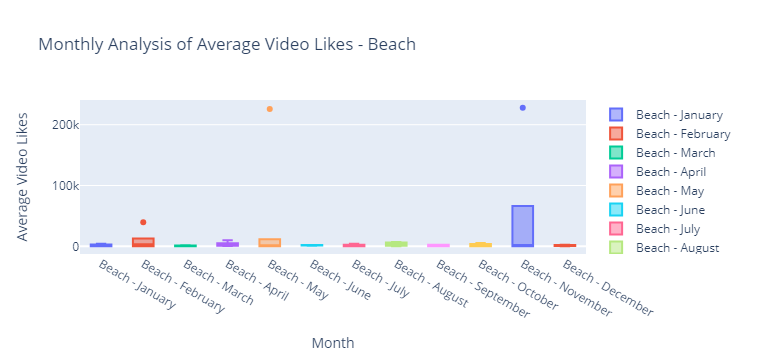

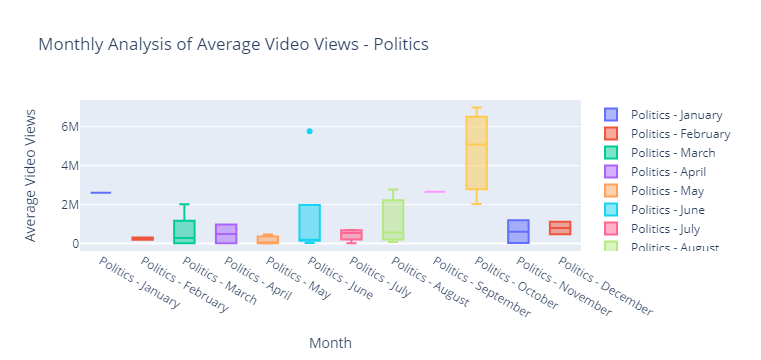

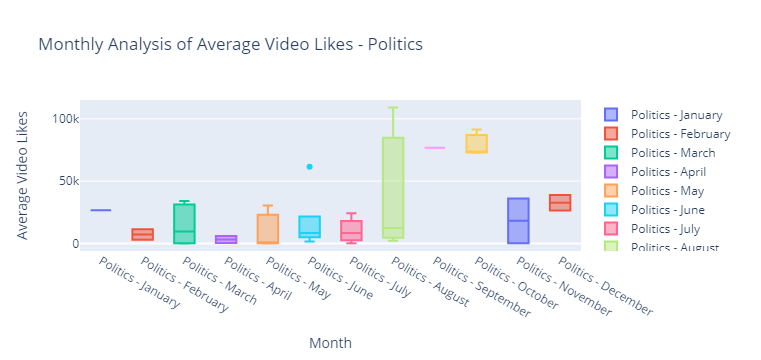

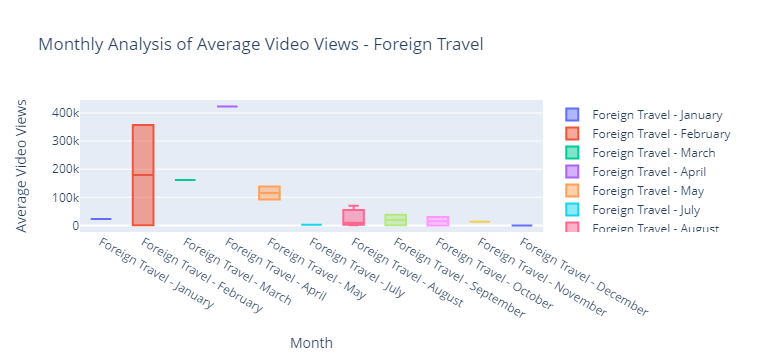

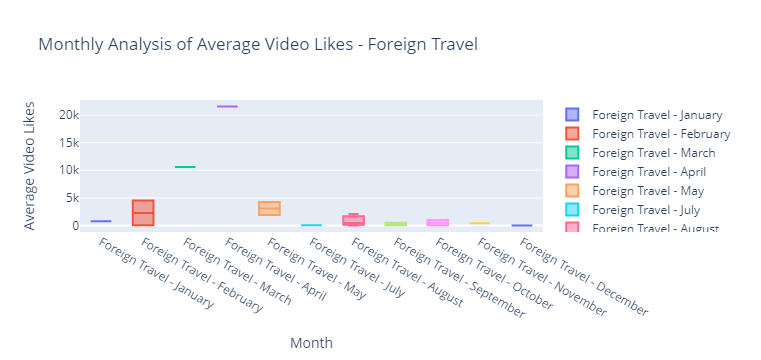

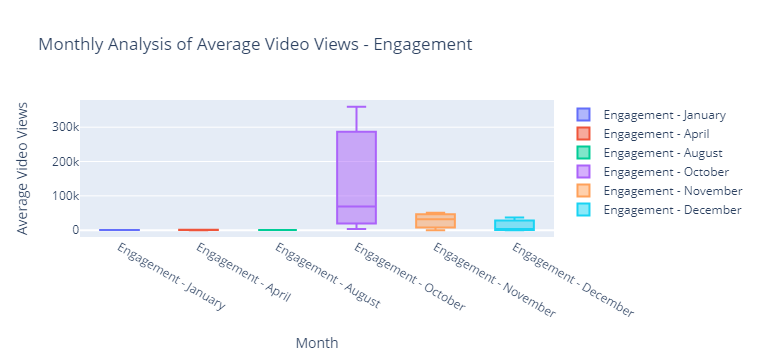

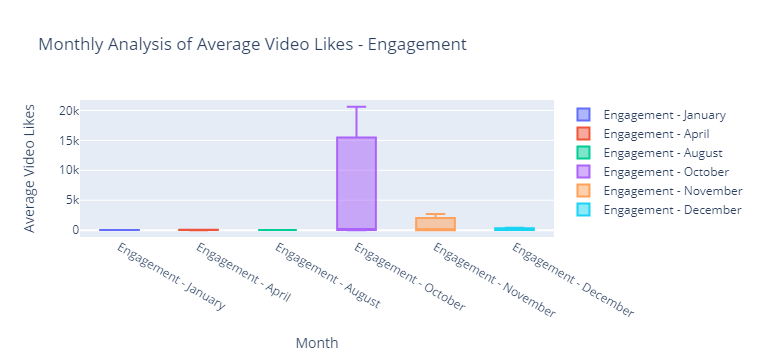

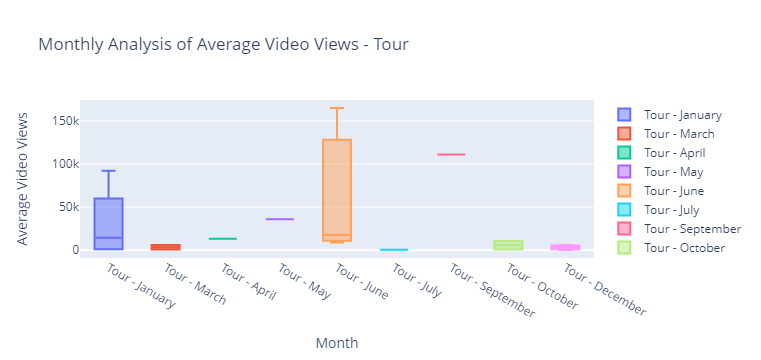

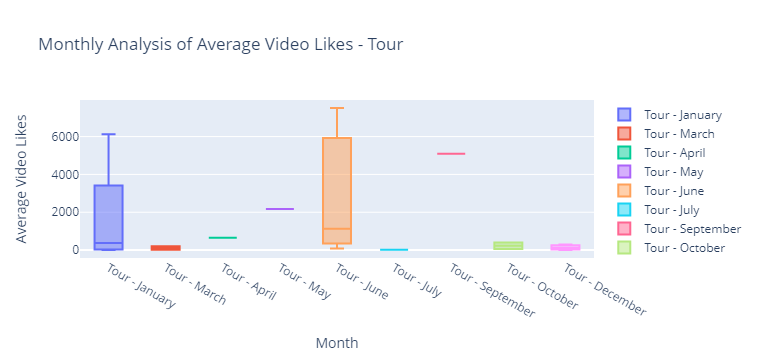

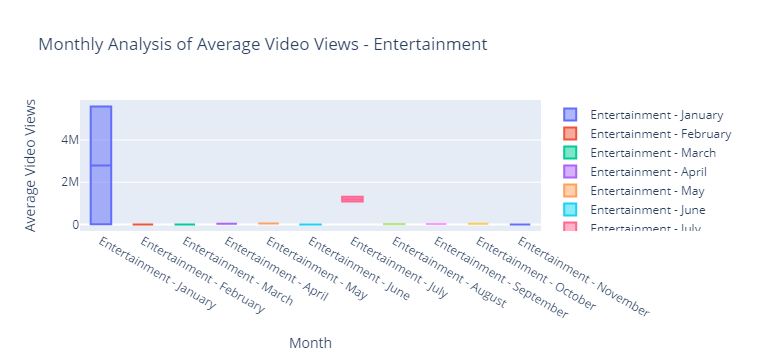

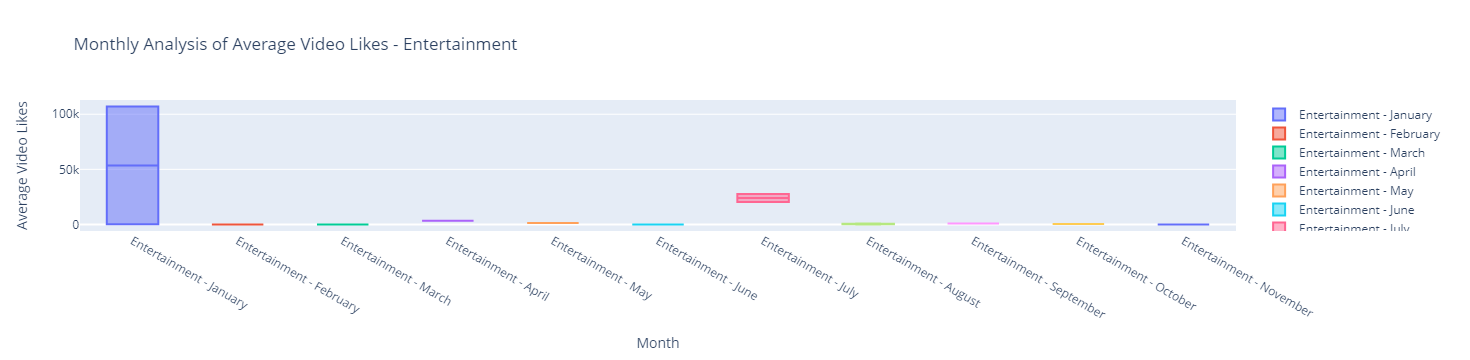

In [32]:
import pandas as pd
import plotly.graph_objects as go

# Define cluster names
cluster_names = {
    0: 'Food', 1: 'Media', 2: 'Travel', 3: 'Culture', 4: 'Beach',
    5: 'Politics', 6: 'Foreign Travel', 7: 'Engagement', 8: 'Tour', 9: 'Entertainment'
}

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Function to read and process data for each cluster
def process_cluster_data(cluster_id, column_name):
    file_path = 'D:\\1. STINTSY\\BERTOPIC-EXPERIMENT-CSVs\\Trial8\\cluster' + str(cluster_id) +'.csv'
    df = pd.read_csv(file_path)
    df['Publish Date'] = pd.to_datetime(df['Publish Date'])
    # Remove timezone information
    df['Publish Date'] = df['Publish Date'].dt.tz_localize(None)
    # Group by year-month and calculate mean values
    values_by_month = df.groupby(df['Publish Date'].dt.to_period('M'))[column_name].mean().reset_index()
    # Convert period to string representing month
    values_by_month['Publish Date'] = values_by_month['Publish Date'].dt.to_timestamp().dt.strftime('%B')
    # Convert month to categorical data with the correct order
    values_by_month['Publish Date'] = pd.Categorical(values_by_month['Publish Date'], categories=month_order, ordered=True)
    # Sort the DataFrame by month order
    values_by_month = values_by_month.sort_values(by='Publish Date')
    return values_by_month

# Loop through each cluster and create a separate box plot graph
for cluster_id in range(10):
    cluster_data_views = process_cluster_data(cluster_id, 'Video Views')
    cluster_data_likes = process_cluster_data(cluster_id, 'Video Likes')
    
    # Check if there is any data for the cluster
    if not cluster_data_views.empty:
        fig_views_box = go.Figure()
        for month in cluster_data_views['Publish Date'].unique():
            month_data = cluster_data_views[cluster_data_views['Publish Date'] == month]
            fig_views_box.add_trace(go.Box(y=month_data['Video Views'], name=f'{cluster_names[cluster_id]} - {month}'))
        fig_views_box.update_layout(
            title=f'Monthly Analysis of Average Video Views - {cluster_names[cluster_id]}',
            xaxis_title='Month',
            yaxis_title='Average Video Views',
        )
        fig_views_box.show()

    # Check if there is any data for the cluster
    if not cluster_data_likes.empty:
        fig_likes_box = go.Figure()
        for month in cluster_data_likes['Publish Date'].unique():
            month_data = cluster_data_likes[cluster_data_likes['Publish Date'] == month]
            fig_likes_box.add_trace(go.Box(y=month_data['Video Likes'], name=f'{cluster_names[cluster_id]} - {month}'))
        fig_likes_box.update_layout(
            title=f'Monthly Analysis of Average Video Likes - {cluster_names[cluster_id]}',
            xaxis_title='Month',
            yaxis_title='Average Video Likes',
        )
        fig_likes_box.show()


#### **Top Topics Over Time**    

In [1]:
import pandas as pd
import glob

# Specify the directory containing the CSV files
directory_path = 'Trial8'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(f'{directory_path}/*.csv')

# Check if any CSV files were found
if not csv_files:
    raise ValueError(f"No CSV files found in directory: {directory_path}")

# Initialize a list to hold the DataFrames
dataframes = []

# Iterate over the list of CSV files
for file_path in csv_files:
    # Extract the cluster ID from the file name
    # Assuming the file name format is 'clusterX.csv' where X is the cluster ID
    cluster_id = file_path.split('cluster')[-1].split('.')[0]
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Add a new column to the DataFrame for the cluster ID
    if cluster_id == "0":
        df['ClusterID'] = cluster_id + " - Food"
    if cluster_id == "1":
        df['ClusterID'] = cluster_id + " - Media"
    if cluster_id == "2":
        df['ClusterID'] = cluster_id + " - Travel"
    if cluster_id == "3":
        df['ClusterID'] = cluster_id + " - Culture"
    if cluster_id == "4":
        df['ClusterID'] = cluster_id + " - Beach"
    if cluster_id == "5":
        df['ClusterID'] = cluster_id + " - Politics"
    if cluster_id == "6":
        df['ClusterID'] = cluster_id + " - Foreign Travel"
    if cluster_id == "7":
        df['ClusterID'] = cluster_id + " - Engagement"
    if cluster_id == "8":
        df['ClusterID'] = cluster_id + " - Tour"
    if cluster_id == "9":
        df['ClusterID'] = cluster_id + " - Entertainment"

    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
# This will make it easier to manipulate and visualize the data
    

all_clusters_df = pd.concat(dataframes, ignore_index=True)

In [2]:
import pandas as pd
import glob

# Specify the directory containing the CSV files
directory_path = 'Trial8'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(f'{directory_path}/*.csv')

# Check if any CSV files were found
if not csv_files:
    raise ValueError(f"No CSV files found in directory: {directory_path}")

# Initialize a list to hold the DataFrames
dataframes = []

# Iterate over the list of CSV files
for file_path in csv_files:
    # Extract the cluster ID from the file name
    # Assuming the file name format is 'clusterX.csv' where X is the cluster ID
    cluster_id = file_path.split('cluster')[-1].split('.')[0]
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Add a new column to the DataFrame for the cluster ID
    if cluster_id == "0":
        df['ClusterID'] = cluster_id + " - Food"
    if cluster_id == "1":
        df['ClusterID'] = cluster_id + " - Media"
    if cluster_id == "2":
        df['ClusterID'] = cluster_id + " - Travel"
    if cluster_id == "3":
        df['ClusterID'] = cluster_id + " - Culture"
    if cluster_id == "4":
        df['ClusterID'] = cluster_id + " - Beach"
    if cluster_id == "5":
        df['ClusterID'] = cluster_id + " - Politics"
    if cluster_id == "6":
        df['ClusterID'] = cluster_id + " - Foreign Travel"
    if cluster_id == "7":
        df['ClusterID'] = cluster_id + " - Engagement"
    if cluster_id == "8":
        df['ClusterID'] = cluster_id + " - Tour"
    if cluster_id == "9":
        df['ClusterID'] = cluster_id + " - Entertainment"

    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
# This will make it easier to manipulate and visualize the data
    

all_clusters_df = pd.concat(dataframes, ignore_index=True)
display(all_clusters_df)

Video Id          Publish Date                Channel Id  \
0     M0lKXfyJh-I  2019-05-31T03:40:39Z  UCZ7Cxp6r5JMhpSrIETCXzdQ   
1     LB20skQI1_k  2021-10-21T09:30:48Z  UCZ7Cxp6r5JMhpSrIETCXzdQ   
2     mTCgnJCyz2Q  2017-04-13T14:00:03Z  UCRzPUBhXUZHclB7B5bURFXw   
3     yOw0sYXvbIc  2018-05-09T14:26:28Z  UCRzPUBhXUZHclB7B5bURFXw   
4     _xuMLlPPhtc  2018-08-29T15:00:05Z  UCRzPUBhXUZHclB7B5bURFXw   
...           ...                   ...                       ...   
1462  YFOx5_ozQH8  2021-07-15T20:57:38Z  UCSKyr0rInDNW2jAWKVy4OcA   
1463  vyezxhPOZsg  2020-08-12T10:15:01Z  UChoyPLPxhJ3SgSbdRQ0m4RQ   
1464  f0rq_-Wupeg  2022-06-13T08:16:05Z  UCAtoU5rzWIGE9WMj7aVdUrg   
1465  sXsHYugynnI  2023-08-11T10:36:39Z  UCfXT2sohC0RuRDBo49ARTuQ   
1466  DFX3IvmoO18  2023-08-17T00:33:18Z  UCfXT2sohC0RuRDBo49ARTuQ   

                                            Video Title  \
0       If FREDDIE MERCURY Were FILIPINO (QUEEN Parody)   
1        If BRITNEY SPEARS Was FILIPINO (PARODY MEDLEY)   
2     Why Jollibee's Fast Food has Americans Waiting...   
3     The Amazing Filipino Restaurant Right Near The...   
4     Bad Saint Is the Most Popular Filipino Restaur...   
...                                                 ...   
1462          Celebrities You Didn't Know Were Filipino   
1463  Top 10 Most Expensive Gifts Of Filipino Celebr...   
1464       Top 10 Most Beautiful Filipino Women in 2022   
1465  Top 12 Most Followed Filipino Celebrities on S...   
1466  Top 12 Most Awarded Filipino Celebrities of Al...   

                                      Video Description    Channel Title  \
0     ▶Click here to SUBSCRIBE to my channel: https:...     Mikey Bustos   
1     If Britney Spears was Filipino, her songs woul...     Mikey Bustos   
2     In our premiere episode of Eater's new series,...            Eater   
3     On today’s episode of Dining on a Dime: Rome, ...            Eater   
4     Welcome back to Halo Halo! In this episode, Fr...            Eater   
...                                                 ...              ...   
1462  We ranked the Celebrities You Didn't Know Were...  Discovery Amuse   
1463  Top 10 Most Expensive Gifts Of Filipino Celebr...     Top 10 World   
1464  About Top 10s\n\nTop 10 Most Beautiful Filipin...     Top 10 Today   
1465  Top 12 Most Followed Filipino Celebrities\n\nH...       Ay Kaptyur   
1466  Discover the most awarded Filipino celebrities...       Ay Kaptyur   

                                             Video Tags  \
0     ['Mikey Bustos', 'Pinoy', 'Filipino', 'Philipp...   
1     ['Mikey Bustos', 'Pinoy', 'Filipino', 'Philipp...   
2     ['jollibee', 'jollibees', 'dale talde', 'talde...   
3     ['filipino food', 'sisig', 'filipino rome', 'f...   
4     ['filipino', 'filipino food', 'filipino restau...   
...                                                 ...   
1462  ['tonight show', 'jimmy fallon', 'olivia rodri...   
1463  ['Top 10', 'Top 10 World', 'top10world', 'Fili...   
1464                                                 []   
1465  ['Ivana Alawi', 'Vice Ganda', 'Anne Curtis', '...   
1466  ['Filipino celebrities', 'awards', 'acting', '...   

     Default Audio Language  Video Views  Video Likes  Favorite Count  \
0                        en      4696159       154513               0   
1                        en       312769        12650               0   
2                        en       818324         8769               0   
3                        en       533833         9254               0   
4                        en       602649        10519               0   
...                     ...          ...          ...             ...   
1462                     en      1315124        20339               0   
1463                     en         5907           55               0   
1464                     en          756           10               0   
1465                     en         2570           37               0   
1466                     en        11278      

In [3]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px

def create_hyperlink(row):
    return html.A(row['Channel Title'], href=f"https://www.youtube.com/channel/{row['Channel Id']}")

# Assuming 'all_clusters_df' is the combined dataframe from both datasets
all_clusters_df['Year'] = pd.to_datetime(all_clusters_df['Publish Date']).dt.year

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, 'https://codepen.io/chriddyp/pen/bWLwgP.css'])

# Create a Plotly figure
fig = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()

#START: TOPICS OVER TIME
# Add a bar chart to the figure for each year and each cluster
for year in sorted(all_clusters_df['Year'].unique()):
    for cluster in sorted(all_clusters_df['ClusterID'].unique()):
        # Filter data for the current year and cluster
        filtered_df = all_clusters_df[(all_clusters_df['Year'] == year) & (all_clusters_df['ClusterID'] == cluster)]
        count = len(filtered_df)  # Get the count of entries
        
        # Add trace
        fig.add_trace(go.Bar(
            x=[str(cluster)],  # Ensure x is treated as categorical data
            y=[count],
            name=f'Cluster {cluster}',
            visible=(year == sorted(all_clusters_df['Year'].unique())[0])  # Only the first year is visible
        ))

# Define a consistent color palette
colors = px.colors.qualitative.Plotly

cluster_names = {
    0: 'Food', 1: 'Media', 2: 'Travel', 3: 'Culture', 
    4: 'Beach', 5: 'Politics', 6: 'Foreign Travel', 
    7: 'Engagement', 8: 'Tour', 9: 'Entertainment'
}

video_counts = all_clusters_df.groupby(['Year', 'ClusterID']).size().reset_index(name='Count')

data = []
for cluster in range(10):
    cluster_data = video_counts[video_counts['ClusterID'].str[0].astype(int) == cluster]
    trace = go.Scatter(x=cluster_data['Year'], y=cluster_data['Count'], mode='lines', name=f'{cluster_names[cluster]}')
    data.append(trace)

layout = go.Layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Videos'),
    legend=dict(x=1.02, y=1, xanchor='left', yanchor='top'),  # Position legend outside the graph
    height=600  # Adjust the height as desired
)

fig3 = go.Figure(data=data, layout=layout)

# START: CHANNEL STATISTICS
grouped_channels = all_clusters_df.groupby(['ClusterID', 'Channel Title'], as_index=False).agg({
    'Video Views': 'mean',
    'Video Likes': 'mean'
})

def get_top_n_per_cluster(df, column, n=10):
    return df.groupby('ClusterID', group_keys=False).apply(lambda x: x.nlargest(n, column)).reset_index(drop=True)

# Get top 10 channels per cluster by video views
top_10_views_per_cluster = get_top_n_per_cluster(grouped_channels, 'Video Views', n=10)

cluster_ids = grouped_channels['ClusterID'].unique()
cluster_ids_list = cluster_ids.tolist()

for cluster_id in cluster_ids_list:
    filtered_df_views = top_10_views_per_cluster[top_10_views_per_cluster['ClusterID'] == cluster_id]

    # Adding a table for views
    fig2.add_trace(go.Table(
        header=dict(values=['Channel Title', 'Video Views', 'Video Likes'], fill_color='paleturquoise'),
        cells=dict(values=[filtered_df_views['Channel Title'], filtered_df_views['Video Views'], filtered_df_views['Video Likes']], fill_color='lavender'),
        visible=(cluster_id == cluster_ids_list[0]),  # Make the first cluster visible by default
        name=f"Views-{cluster_id}"
    ))

dropdown_items = []
for cluster_id in cluster_ids_list:
    visibility = [False] * len(cluster_ids_list)  # Now we have only 1 table (views) for each cluster
    visibility[cluster_ids_list.index(cluster_id)] = True  # Enable visibility for the current cluster's views

    dropdown_items.append(
        {
            "label": f"Cluster {cluster_id}",
            "method": "update",
            "args": [{"visible": visibility},
                     {"title": f"Top 10 Channels by Video Views in Cluster {cluster_id}"}]
        }
    )

most_popular_country_per_cluster = all_clusters_df.groupby(['ClusterID', 'Channel Country']).size().reset_index(name='Count')

def process_cluster_data(df, metric):
    df['Publish Date'] = pd.to_datetime(df['Publish Date'])
    threshold_low = df[metric].quantile(0.025)
    threshold_high = df[metric].quantile(0.975)
    df_trimmed = df[df[metric].between(threshold_low, threshold_high)].copy()
    metric_by_year_trimmed = df_trimmed.groupby(df_trimmed['Publish Date'].dt.year)[metric].mean().reset_index()
    return metric_by_year_trimmed

file_path_pattern = 'Trial8\\cluster{}.csv'

# Load all data into a dictionary of DataFrames
cluster_data = {}
for cluster_id in range(10):
    file_path = file_path_pattern.format(cluster_id)
    cluster_data[cluster_id] = pd.read_csv(file_path)

# Define the layout of the Dash app
app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Pinoy Baiting Dashboard", className="text-center mb-4"), width=12)),
    dbc.Tabs([
        dbc.Tab(label="Statistics Over Time", children=[
            dbc.Row([
                dbc.Col([
                    html.H4("Top Topics Over Time", className="text-center mb-4"),
                    dcc.Dropdown(
                    id='year-dropdown1',  # Update to year-dropdown1
                    options=[{'label': str(year), 'value': str(year)} for year in sorted(all_clusters_df['Year'].unique())],
                    value=str(sorted(all_clusters_df['Year'].unique())[0]),
                    clearable=False,
                    className="mb-4"
                    ),
                    dcc.Graph(
                    id='graph1',  # Update to graph1
                    figure=fig,
                    config={'staticPlot': False, 'responsive': True}
                    ),
                    dcc.Graph(
                        id='videos-per-year-per-cluster',
                        figure=fig3
                    )
                ], width=6),
                dbc.Col([
                    html.Div([
                        html.H4("Views and Likes Over Time", className="text-center mb-4"),
                        dcc.Graph(id='views-graph'),
                        dcc.Graph(id='likes-graph')
                    ])
                ], width=6)
            ])
        ]),
        dbc.Tab(label="Channel & Country Statistics", children=[
            dbc.Row([
                dbc.Col([
                    html.Div([
                        html.H4("Channel Statistics", className="text-center mb-4"),
                        html.Label('Cluster:', style={'font-family': 'Inter, sans-serif'}),
                        dcc.Dropdown(
                            id='cluster-dropdown',
                            options=[{'label': value, 'value': key} for key, value in cluster_names.items()],
                            value=0,  # Default value
                            style={'font-family': 'Inter, sans-serif'}
                        ),
                        html.Label('Parameter:', style={'font-family': 'Inter, sans-serif'}),
                        dcc.Dropdown(
                            id='parameter-dropdown',
                            options=[{'label': option, 'value': option} for option in ['Upload Count', 'Video Views', 'Video Likes', 'Comment Count']],
                            value='Upload Count',  # Default value
                            style={'font-family': 'Inter, sans-serif'}
                        ),
                        html.Label('Number of Results:', style={'font-family': 'Inter, sans-serif'}),
                        dcc.Slider(
                            id='results-slider',
                            min=1,
                            max=10,
                            step=1,
                            value=1,
                            marks={i: str(i) for i in range(1, 11)}
                        ),
                        dcc.Checklist(
                            id='year-filter-checkbox',
                            options=[{'label': 'Filter by Year', 'value': 'filter_year'}],
                            value=['filter_year'],  # Default value is checked
                            style={'font-family': 'Inter, sans-serif'}
                        ),
                        dcc.RangeSlider(
                            id='year-range-slider',
                            min=cluster_data[0]['Publish Date'].apply(lambda x: pd.to_datetime(x).year).min(),
                            max=cluster_data[0]['Publish Date'].apply(lambda x: pd.to_datetime(x).year).max(),
                            step=1,
                            value=[
                                cluster_data[0]['Publish Date'].apply(lambda x: pd.to_datetime(x).year).min(),
                                cluster_data[0]['Publish Date'].apply(lambda x: pd.to_datetime(x).year).max()
                            ],
                            marks={i: str(i) for i in range(cluster_data[0]['Publish Date'].apply(lambda x: pd.to_datetime(x).year).min(), 
                                                            cluster_data[0]['Publish Date'].apply(lambda x: pd.to_datetime(x).year).max() + 1)}
                        ),
                        html.Div(id='data-table-container', style={'overflowY': 'scroll', 'maxHeight': '200px'})
                    ])
                ], width=6),
                dbc.Col([
                    html.Div([
                        html.Div(style={'margin-top': '20px'}),  # Add space before the H6 element

                        html.H6("Top Country Uploads per Cluster", className="text-center mb-4"),
                        dcc.Dropdown(
                            id='cluster-dropdown-4',
                            options=[{'label': value, 'value': key} for key, value in cluster_names.items()],
                            value=0  # Default value
                        ),
                        dcc.Slider(
                            id='country-slider',
                            min=5,
                            max=most_popular_country_per_cluster['Channel Country'].nunique(),
                            step=5,
                            value=5,  # Default value
                            marks={i: str(i) for i in range(5, most_popular_country_per_cluster['Channel Country'].nunique() + 1, 5)}
                        ),
                        dcc.Graph(
                            id='most-popular-country-per-cluster'
                        )
                    ])
                ], width=6)
            ])
        ])
    ])
], className="container-fluid")

@app.callback(
    Output('results-slider', 'max'),
    Output('results-slider', 'marks'),
    [Input('cluster-dropdown', 'value'), 
     Input('year-filter-checkbox', 'value'),
     Input('year-range-slider', 'value')]
)
def update_slider_max(selected_cluster, filter_year, selected_year_range):
    df = cluster_data[selected_cluster]
    df['Year'] = pd.to_datetime(df['Publish Date']).dt.year

    if 'filter_year' in filter_year:
        df = df[(df['Year'] >= selected_year_range[0]) & (df['Year'] <= selected_year_range[1])]
        max_results = df.groupby('Year')['Channel Title'].nunique().max()
    else:
        max_results = df['Channel Title'].nunique()

    max_results = max_results if max_results else 1
    marks = {i: str(i) for i in range(1, max_results + 1, 10)}
    return max_results, marks

@app.callback(
    [Output('graph1', 'figure'),
     Output('data-table-container', 'children'),
     Output('most-popular-country-per-cluster', 'figure'),
     Output('views-graph', 'figure'),
     Output('likes-graph', 'figure')],
    [Input('year-dropdown1', 'value'),
     Input('cluster-dropdown', 'value'), Input('parameter-dropdown', 'value'), Input('results-slider', 'value'), 
     Input('year-filter-checkbox', 'value'), Input('year-range-slider', 'value'),
     Input('cluster-dropdown-4', 'value'), Input('country-slider', 'value')])  # Add input for the cluster dropdown)

def update_figures(selected_year, selected_cluster, selected_parameter, results_per_year, filter_year, selected_year_range, selected_cluster_4, num_countries):
    # Create new figures to update the graphs based on the selected year
    selected_year = int(selected_year)

    # Update graph1
    new_fig = go.Figure()
    for i, cluster in enumerate(sorted(all_clusters_df['ClusterID'].unique())):
        # Filter data for the selected year and cluster
        filtered_df = all_clusters_df[(all_clusters_df['Year'] == selected_year) & (all_clusters_df['ClusterID'] == cluster)]
        count = len(filtered_df)  # Get the count of entries

        # Add trace for the current cluster using 'i' to access colors array safely
        new_fig.add_trace(go.Bar(
            x=[str(cluster)],  # Ensure x is treated as categorical data
            y=[count],
            name=f'Cluster {cluster}',
            marker=dict(color=colors[i % len(colors)])  # Use colors from the palette
        ))
    # Update layouts
    new_fig.update_layout(
        paper_bgcolor='white',
        plot_bgcolor='white',
        height=400
        # Add other layout properties as needed
    )

    #graph2
    df = cluster_data[selected_cluster]
    df['Year'] = pd.to_datetime(df['Publish Date']).dt.year
    
    if 'filter_year' in filter_year:
        df = df[(df['Year'] >= selected_year_range[0]) & (df['Year'] <= selected_year_range[1])]
        if selected_parameter == 'Upload Count':
            top_channels = df.groupby(['Year', 'Channel Title']).size().reset_index(name='Upload Count').groupby('Year').apply(lambda x: x.nlargest(results_per_year, 'Upload Count')).reset_index(drop=True)
        else:
            top_channels = df.groupby(['Year', 'Channel Title']).agg({selected_parameter: 'sum'}).reset_index()
            top_channels = top_channels.groupby('Year').apply(lambda x: x.nlargest(results_per_year, selected_parameter)).reset_index(drop=True)
    else:
        if selected_parameter == 'Upload Count':
            top_channels = df.groupby('Channel Title').size().reset_index(name='Upload Count').nlargest(results_per_year, 'Upload Count')
        else:
            top_channels = df.groupby('Channel Title').agg({selected_parameter: 'sum'}).reset_index().nlargest(results_per_year, selected_parameter)

    # Generate a table figure using Plotly
    # table_fig = ff.create_table(top_channels[['Year', 'Channel Title', selected_parameter]])
    columns = ['Year', 'Channel Title', selected_parameter] if 'filter_year' in filter_year else ['Channel Title', selected_parameter]
    table_fig = go.Figure(data=[go.Table(
        header=dict(values=columns, fill_color='paleturquoise', align='left'),
        cells=dict(values=[top_channels[col] for col in columns], fill_color='lavender', align='left')
    )])

    #graph4
    filtered_df = most_popular_country_per_cluster[most_popular_country_per_cluster['ClusterID'].str[0].astype(int) == selected_cluster_4]
    filtered_df = filtered_df.sort_values(by='Count', ascending=False).head(num_countries)
    
    fig4 = go.Figure(data=[go.Table(
        header=dict(values=['Channel Country', 'Count'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[filtered_df['Channel Country'], filtered_df['Count']],
                   fill_color='lavender',
                   align='left'))
    ])
    
    fig4.update_layout(height=400)  # Set specific height

    #fig 5 6
    fig_views = go.Figure()
    fig_likes = go.Figure()

    # Loop through each cluster and add to the plots
    for cluster_id in range(10):  # Assuming cluster IDs go from 0 to 9
        # Load the data for the current cluster
        file_path = file_path_pattern.format(cluster_id)
        cluster_df = pd.read_csv(file_path)
        
        # Process the data
        cluster_data_views = process_cluster_data(cluster_df, 'Video Views')
        cluster_data_likes = process_cluster_data(cluster_df, 'Video Likes')
        
        # Add traces to the figures
        fig_views.add_trace(go.Scatter(x=cluster_data_views['Publish Date'], y=cluster_data_views['Video Views'],
                                       mode='lines+markers', name=f'{cluster_names[cluster_id]}',
                                       marker=dict(size=8)))
        
        fig_likes.add_trace(go.Scatter(x=cluster_data_likes['Publish Date'], y=cluster_data_likes['Video Likes'],
                                       mode='lines+markers', name=f'{cluster_names[cluster_id]}',
                                       marker=dict(size=8)))

    # Update layout for views graph
    fig_views.update_layout(
        title='Video Views',
        xaxis_title='Year',
        yaxis_title='Trimmed Video Views',
        legend_title='Cluster ID'
    )

    # Update layout for likes graph
    fig_likes.update_layout(
        title='Video Likes',
        xaxis_title='Year',
        yaxis_title='Trimmed Video Likes',
        legend_title='Cluster ID'
    )


    return new_fig, dcc.Graph(figure=table_fig), fig4, fig_views, fig_likes

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, dev_tools_ui=False, dev_tools_props_check=False, port=8051)


#### **CSV Reading**    

##### **Topic Word Score**    

In [5]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load your CSV file
df = pd.read_csv('csv visualizations\\topic_word_distributions.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1('Topic Word Distributions'),
    dcc.Dropdown(
        id='topic-dropdown',
        options=[{'label': f'Topic {i}', 'value': i} for i in df['Topic'].unique()],
        value=df['Topic'].unique()[0]
    ),
    dcc.Graph(id='word-distribution-graph')
])

# Callback to update the graph based on the selected topic
@app.callback(
    dash.dependencies.Output('word-distribution-graph', 'figure'),
    [dash.dependencies.Input('topic-dropdown', 'value')]
)
def update_graph(selected_topic):
    filtered_df = df[df['Topic'] == selected_topic]
    fig = px.bar(filtered_df, x='Word', y='Probability', title=f'Topic {selected_topic} Word Distribution')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

##### **Intertopic Distance Map**    

In [7]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Load your CSV file
df = pd.read_csv('csv visualizations\\intertopic_distance_map.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1('Intertopic Distance Map'),
    dcc.Graph(id='intertopic-distance-map')
])

# Create the intertopic distance map
def create_intertopic_distance_map(dataframe):
    fig = px.scatter(dataframe, x='X', y='Y', text='Topic', title='Intertopic Distance Map')
    fig.update_traces(textposition='top center')
    fig.update_layout(
        xaxis_title='X',
        yaxis_title='Y',
        showlegend=False,
        template='plotly_white'
    )
    return fig

# Callback to update the graph
@app.callback(
    dash.dependencies.Output('intertopic-distance-map', 'figure'),
    [dash.dependencies.Input('intertopic-distance-map', 'id')]
)
def update_graph(_):
    return create_intertopic_distance_map(df)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

##### **Topic Hierarchy**    

In [13]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Load your CSV file
df = pd.read_csv('csv visualizations\\topic_hierarchy.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Prepare the data for the dendrogram
def create_dendrogram(data):
    # Create linkage matrix
    Z = []
    for i in range(len(data)):
        Z.append([data['Left_Child'][i], data['Right_Child'][i], i, 0])

    Z = np.array(Z)

    # Create dendrogram with right-to-left orientation
    fig = ff.create_dendrogram(Z, orientation='right')
    fig.update_layout(title='Topic Hierarchy')
    return fig

# Create the dendrogram figure
fig = create_dendrogram(df)

# Define the layout of the app
app.layout = html.Div([
    html.H1('Topic Hierarchy'),
    dcc.Graph(figure=fig)
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)